# Introduction

This database contains 14 attributes, which is aligned with all of the published experiments which also use the same subset.

The first 13 attributes are the attributes or features will be used to make the prediction of the 14th attribute which is the "num" column.

This "num" column indicates whether the patient has heart disease. It is integer value from 0 (no presence) to 4. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

There are 303 instances within the Cleveland database

## Problem Statment and Objective

In this notebook, we will be exploring ana analysing the dataset by approaching it as a binary classification task; we will explain how we arrived at this. We will utilise a suite of supervised learning alogrithms as well as unsupervised learning algorithms to help us achieve this.
Ultimately, at the end, we would like to identify the best models for the supervised and unsupervised methods respectively.




## Further Details on the dataset

1.   Age: Patients Age in years (Numeric)
2.   Sex: Gender (Male : 1; Female : 0) (Nominal)
3.    cp: Type of chest pain experienced by patient. This term categorized into 4 category.
0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
4.   trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
5.   chol: Serum cholesterol in mg/dl (Numeric)
6.   fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7.  restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
8.  thalch: Maximum heart rate achieved (Numeric)
9.  exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10.  oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
11.  slope: ST segment measured in terms of slope during peak exercise
0: up sloping; 1: flat; 2: down sloping(Nominal)
12.  ca: The number of major vessels (0–3)(nominal)
13.  thal: A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)
14.  num (target): It is the target variable which we have to predict 1 (1 to 4 in the original data) means patient is suffering from heart disease and 0 means patient is normal.



# Set Up and preparing libraries

In [4]:
## run the 3 following pip installation to have the correct versions before running the rest of the notebook
# pip install --upgrade scikit-learn

In [5]:
# pip install --upgrade numpy

In [6]:
# pip install tensorflow

In [7]:
# import libraries
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import seaborn as sns
sns.set(palette='Paired', style='white')

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Get the current working directory
file_path = os.getcwd()

# Join the directory with the filename
full_path = os.path.join(file_path, 'heart_disease_cleveland.csv')

# Read the CSV file
df = pd.read_csv(full_path)

# Data Exploration and Visualisation

In [9]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160,286,False,lv hypertrophy,108,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120,229,False,lv hypertrophy,129,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130,250,False,normal,187,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130,204,False,lv hypertrophy,172,False,1.4,upsloping,0.0,normal,0


In [10]:
# Check data types of each column
df.dtypes

age           int64
sex          object
dataset      object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang          bool
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [11]:
# changing the boolean data types to string for standardisation and in case of use of specific libraries
df['exang'] = df['exang'].astype(str)
df['fbs'] = df['fbs'].astype(str)

In [12]:
# remove "dataset" column from the df
df = df.drop('dataset', axis=1)

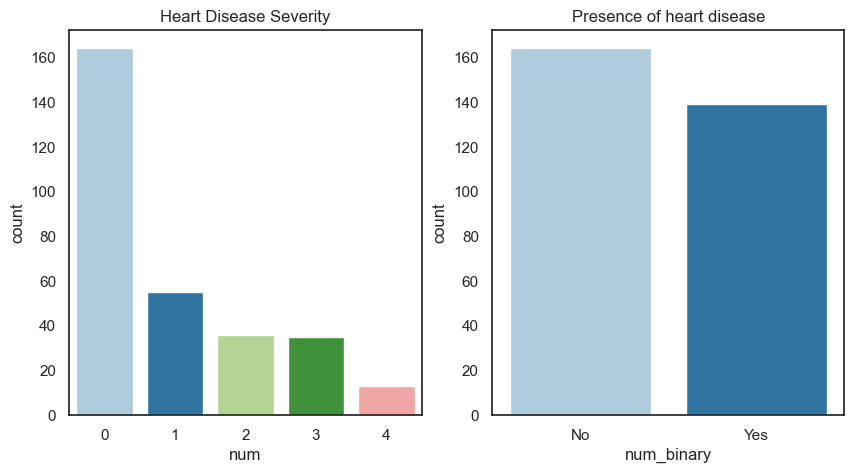

In [13]:
# Distribution across all numbers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='num', data=df)
plt.title('Heart Disease Severity')

# Distribution of 0 vs. the rest
plt.subplot(1, 2, 2)
df1 = df.copy()
df1['num_binary'] = df1['num'].apply(lambda x: 0 if x == 0 else 1)
sns.countplot(x='num_binary', data=df1)
plt.title('Presence of heart disease')
plt.xticks([0,1],['No','Yes'])
plt.show()

From a quick check and plot above, we find out that number of samples for each class is not homogenous (Values 0, 1, 2, 3, 4—samples 164, 55, 36, 35, 13).

Researchers suggest that the five class features of this data set be reduced to two classes; 0 = no disease and 1 = disease. We therefore go ahead and change the target to just 0s and 1s.

In [14]:
# change the problem into a binary classification problem - change num to either 0 if 0 and 1 if not 0
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

## Summary Statistics

In [15]:
# Numerical features
numerical_features = df.select_dtypes(include=['number'])
print("Numerical Features Description:")
print(numerical_features.describe())

# Categorical features
categorical_features = df.select_dtypes(exclude=['number'])
print("\nCategorical Features Description:")
print(categorical_features.describe())

Numerical Features Description:
              age    trestbps        chol      thalch     oldpeak          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean    54.438944  131.689769  246.693069  149.607261    1.039604    0.672241   
std      9.038662   17.599748   51.776918   22.875003    1.161075    0.937438   
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000   
25%     48.000000  120.000000  211.000000  133.500000    0.000000    0.000000   
50%     56.000000  130.000000  241.000000  153.000000    0.800000    0.000000   
75%     61.000000  140.000000  275.000000  166.000000    1.600000    1.000000   
max     77.000000  200.000000  564.000000  202.000000    6.200000    3.000000   

              num  
count  303.000000  
mean     0.458746  
std      0.499120  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  

Categorical Features Description:
         sex           

In [16]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing Values per column:\n", missing_values)


Missing Values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


At the moment, we do not understand the dataset enough to fill the missing values. We will revisit these missing values once we have a better understanding.

## Univariate analysis

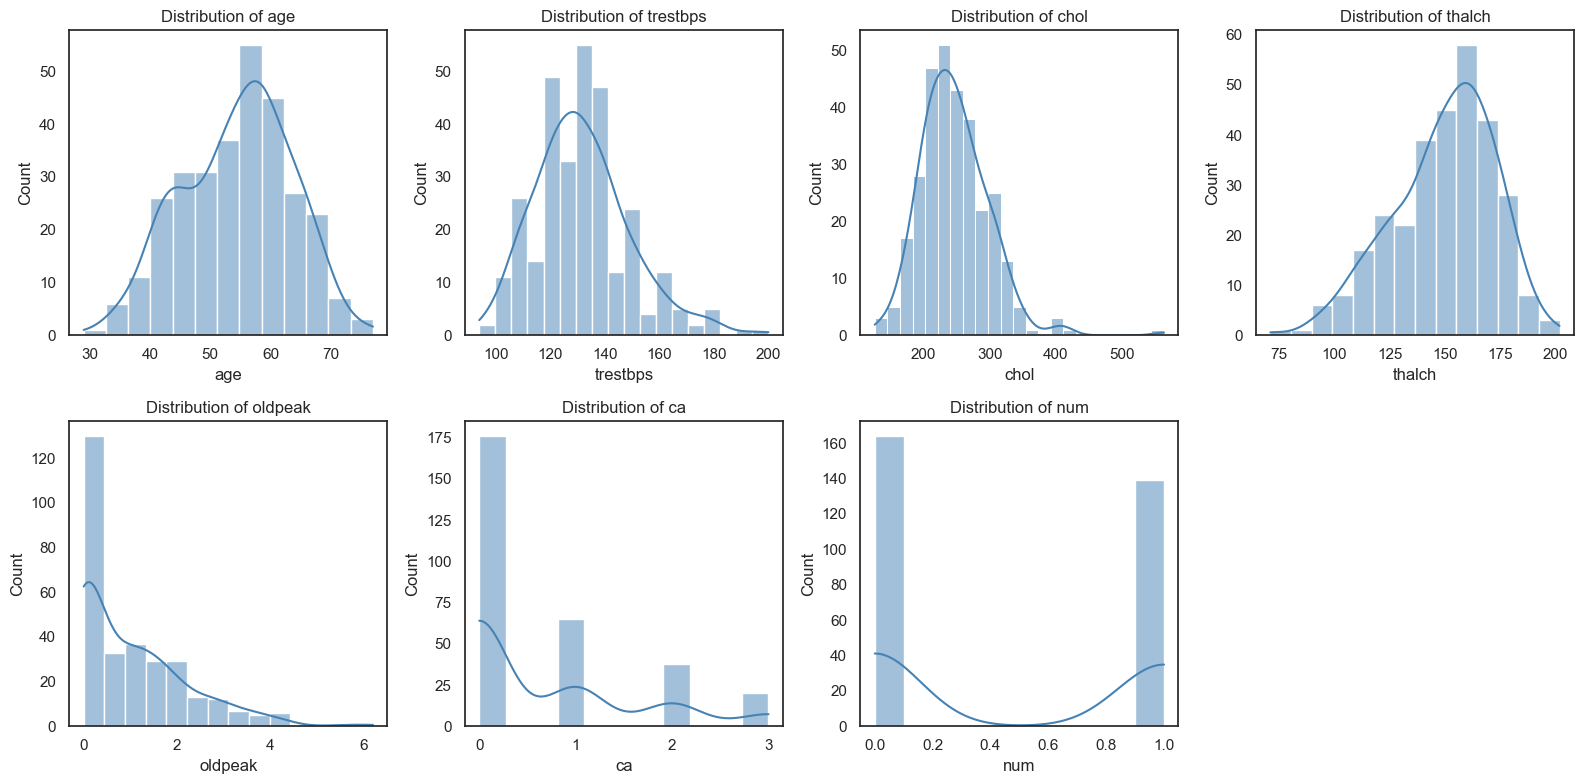

In [17]:
plt.figure(figsize=(16, 8))

for i, col in enumerate(numerical_features.columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(numerical_features[col], kde=True, color='steelblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

From these plots above, we can tell that there is a need to scale the data. Reason being:
1.   Different features are on different magnitude scales
2.   The distribtuion of oldpeak for example could be log transformed to conform more to a normal distribution


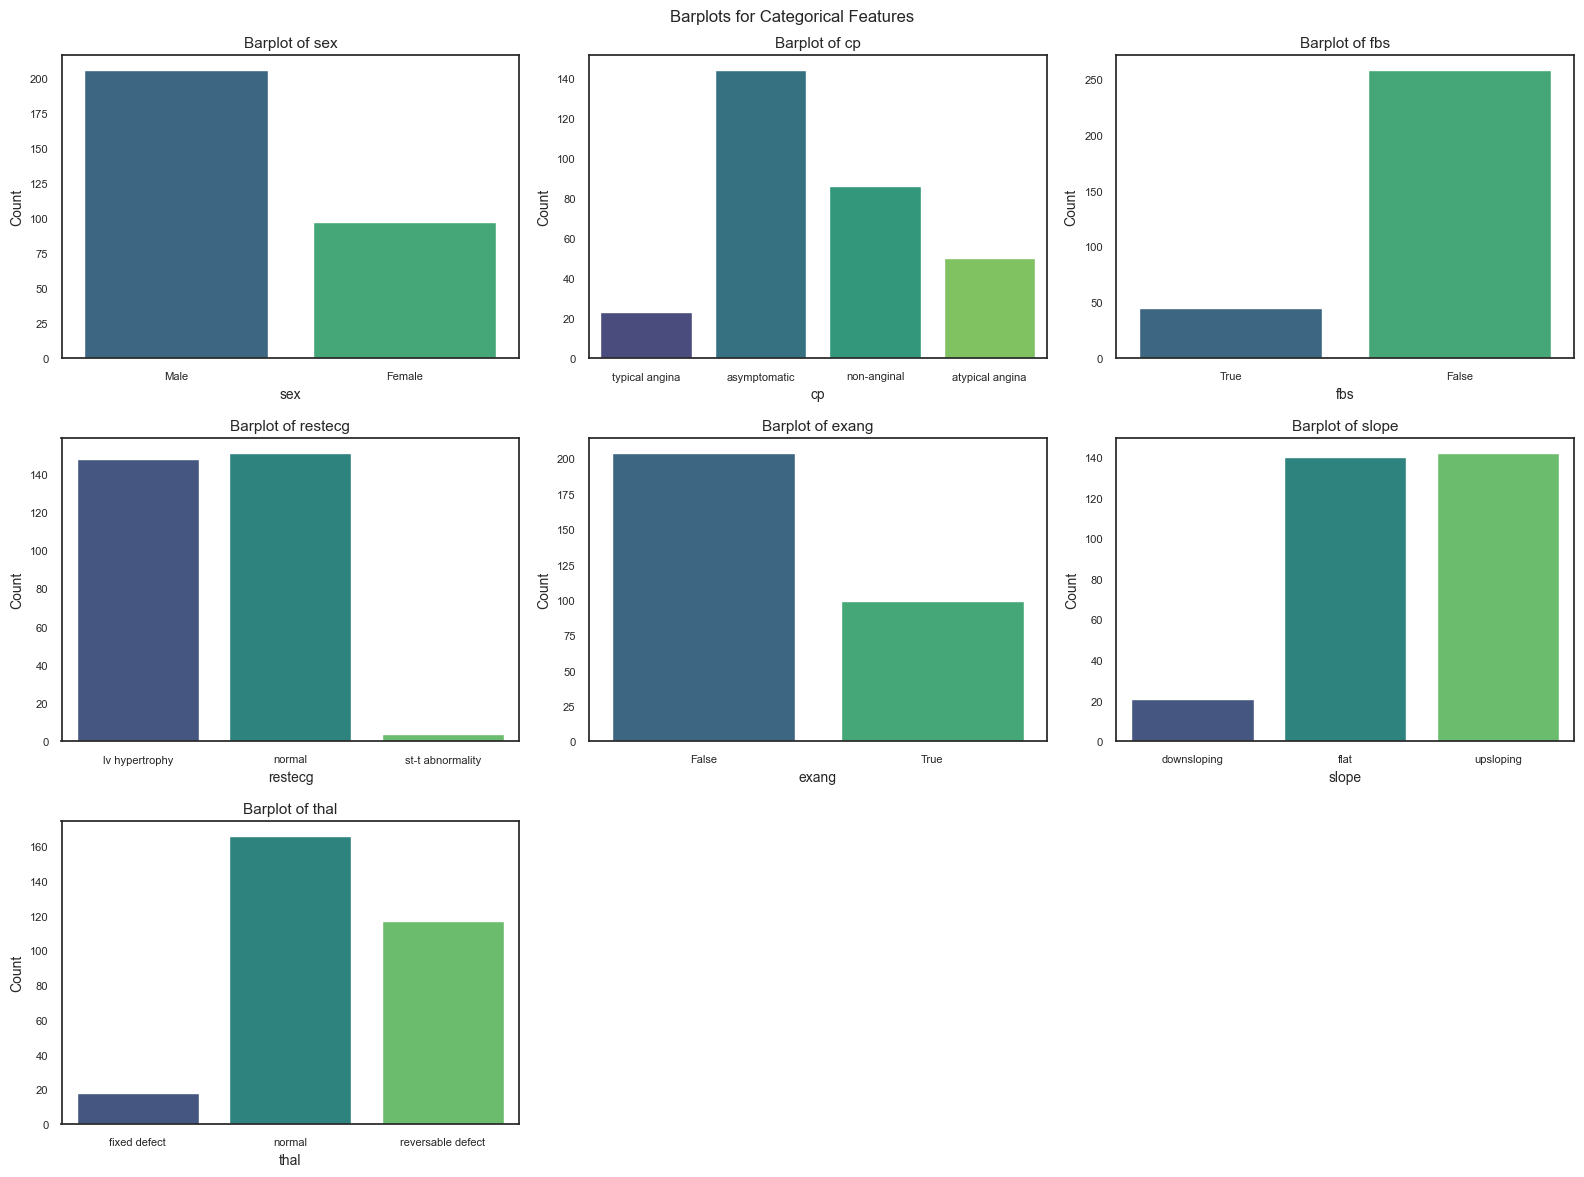

In [18]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(categorical_features.columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f'Barplot of {col}', fontsize=11)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)

plt.suptitle('Barplots for Categorical Features', fontsize=12)
plt.tight_layout()
plt.show()

## Correlations
Checking correlations between numerical features

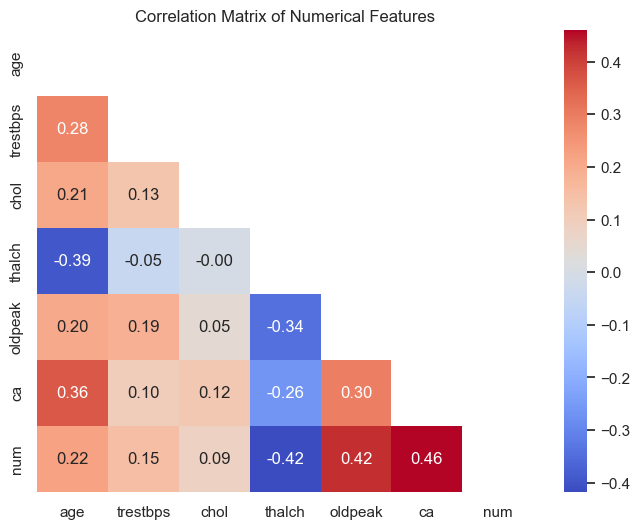

In [19]:
# heatmap correlation of the numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_features.corr(), annot=True, fmt = '.2f', cmap='coolwarm', mask=np.triu(numerical_features.corr()))
plt.title('Correlation Matrix of Numerical Features')
plt.show()

From the heatmap above we notice a few things:
*   In terms of features and their correlation to the target (num), oldpeak and ca have the highest correlation with num at 0.42 and 0.46 respectively
*   ca, oldpeak and age are more positively correlated to one another compared to other correlations
*   trestbps also has a positive correlation with age
*   talch is negatively correlated with all the other features except for chol where there is essentially 0 correlation





## Pairwise Relationships

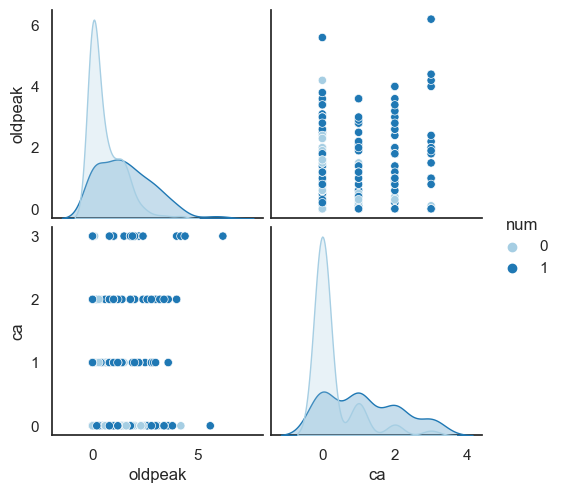

In [20]:
# pairplot between oldpeak and ca
sns.pairplot(df, vars=['oldpeak', 'ca'], hue='num')
plt.show()

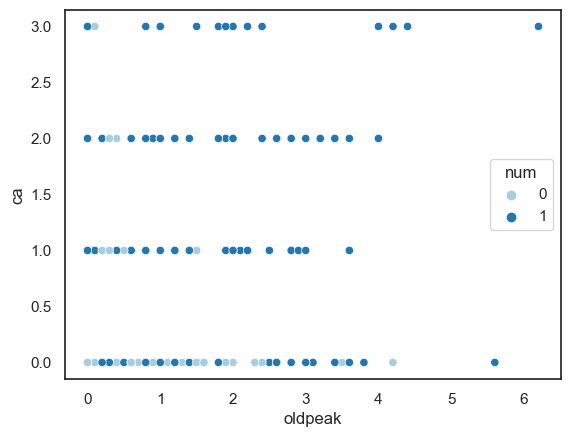

In [21]:
# scatterplot between oldpeak and ca
sns.scatterplot(x='oldpeak', y='ca', hue='num', data=df)
plt.show()

Similar to what was observed in the correlation heatmap, we observe that the dots closer to the origin (0,0) are more associated with no heart disease.

## Analysis of Individual Feature vs Target

### Numerical Features

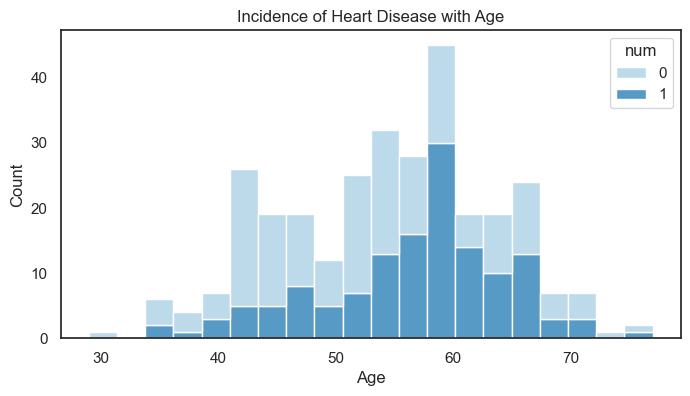

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(x='age', data=df, hue='num', multiple="stack", bins=20)
plt.title('Incidence of Heart Disease with Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [23]:
# grouping samples based on age groups of 5 year intervals
def bin_ages(df):
    min_age = df.age.min()
    max_age = df.age.max()
    df['age_bin'] = pd.cut(df['age'], bins=range(min_age, 80, 5))  # Bin ages in 5-year intervals
    binned_data = df.groupby('age_bin')['num'].agg(['mean', 'count'])
    return binned_data

binned_age_data = bin_ages(df)
binned_age_data

,mean,count
age_bin,,
"(29, 34]",0.000000,2
"(34, 39]",0.333333,12
"(39, 44]",0.250000,40
"(44, 49]",0.375000,32
"(49, 54]",0.321429,56
"(54, 59]",0.608696,69
"(59, 64]",0.660000,50
"(64, 69]",0.516129,31
"(69, 74]",0.375000,8


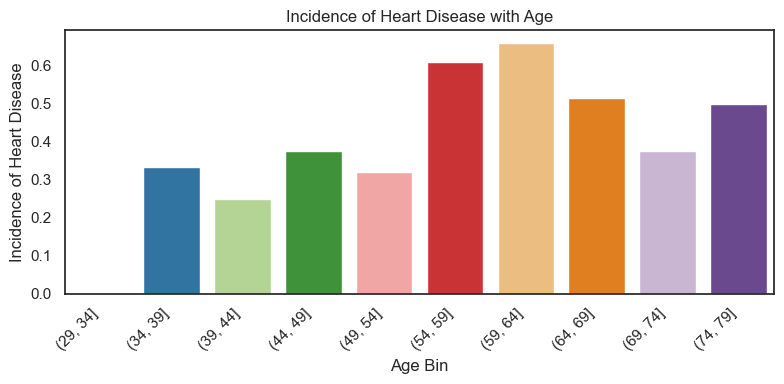

In [24]:
plt.figure(figsize=(8, 4))
sns.barplot(x=binned_age_data.index.astype(str), y='mean', data=binned_age_data)
plt.xlabel('Age Bin')
plt.ylabel('Incidence of Heart Disease')
plt.title('Incidence of Heart Disease with Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the above plot, we can make a few observations:
*   In general, younger age groups tend to have less incidence of heart disease
*   We observe that the incidence rates start to spike for ages 54 to 69, while those who live to older ages from 69 onwards probably have better cardiovascular health in general





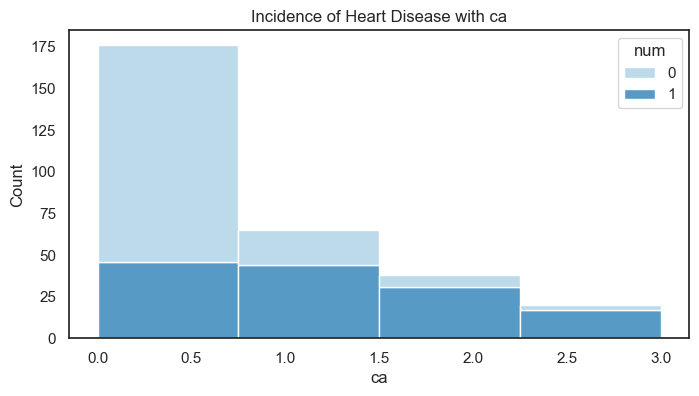

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(x='ca', data=df, hue='num', multiple="stack", bins=4)
plt.title('Incidence of Heart Disease with ca')
plt.xlabel('ca')
plt.ylabel('Count')
plt.show()

The higher number of major vessels coloured, the more likely there is a presence of heart disesase.

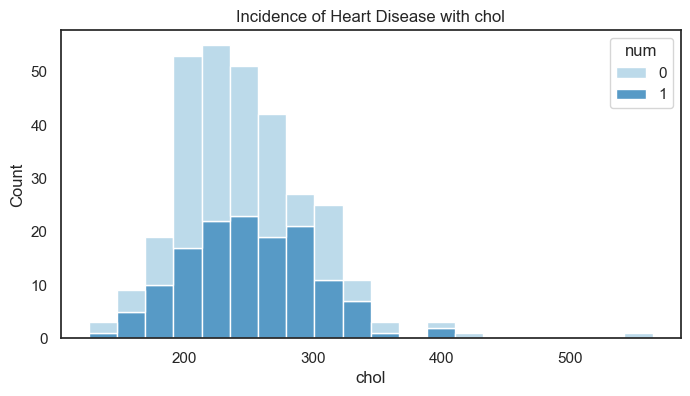

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(x='chol', data=df, hue='num', multiple="stack", bins=20)
plt.title('Incidence of Heart Disease with chol')
plt.xlabel('chol')
plt.ylabel('Count')
plt.show()

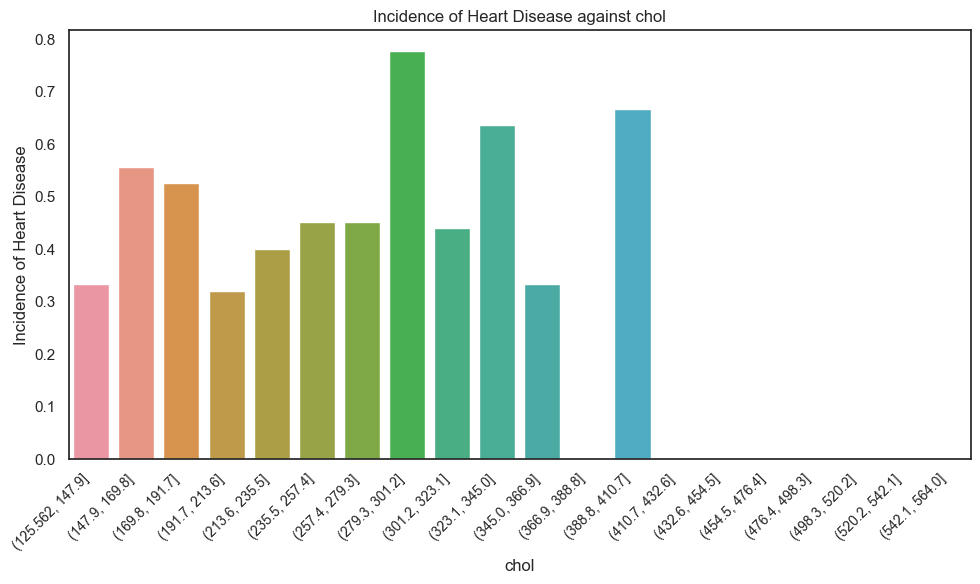

In [27]:
# Create bins for 'chol'
df['chol_bin'] = pd.cut(df['chol'], bins=20)  # Adjust the number of bins as needed

# Calculate the average of 'num' for each 'chol' bin
chol_bin_avg = df.groupby('chol_bin')['num'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=chol_bin_avg.index.astype(str), y=chol_bin_avg.values)
plt.xlabel('chol')
plt.ylabel('Incidence of Heart Disease')
plt.title('Incidence of Heart Disease against chol')
plt.xticks(rotation=45, ha='right', fontsize = 10)
plt.tight_layout()
plt.show()

In general, the higher the chol, the higher the incidence but as we saw in the correlation matrix earlier, chol doesn't have a very high postive correlation with num

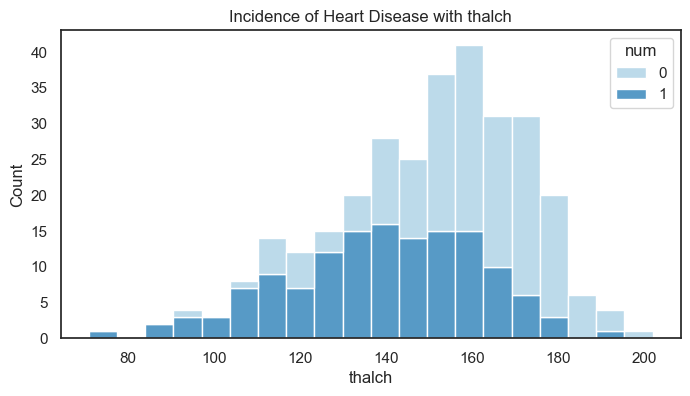

In [28]:
plt.figure(figsize=(8, 4))
sns.histplot(x='thalch', data=df, hue='num', multiple="stack", bins=20)
plt.title('Incidence of Heart Disease with thalch')
plt.xlabel('thalch')
plt.ylabel('Count')
plt.show()

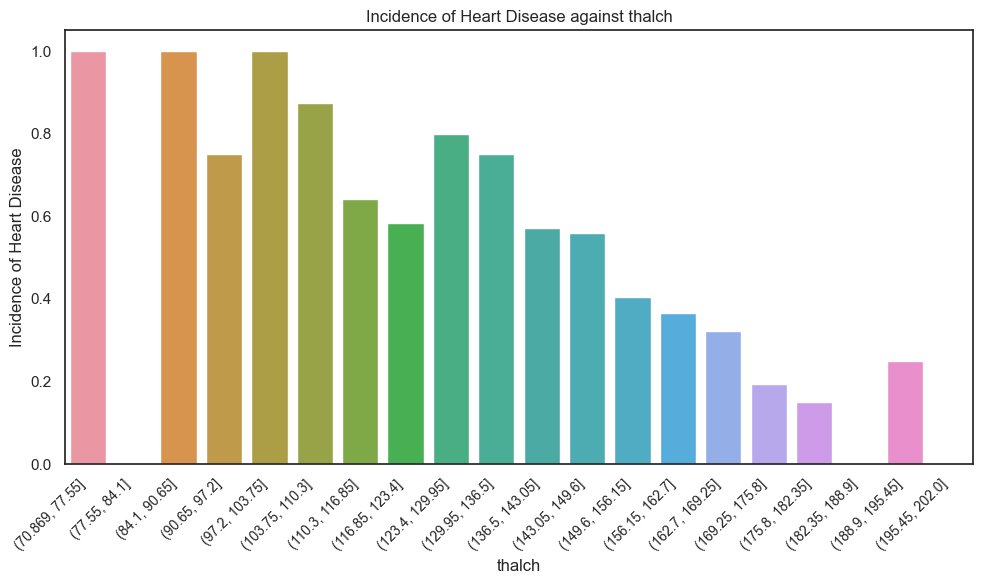

In [29]:
# Create bins for 'thalch'
df['thalch_bin'] = pd.cut(df['thalch'], bins=20)  # Adjust the number of bins as needed

# Calculate the average of 'num' for each 'thalch' bin
thalch_bin_avg = df.groupby('thalch_bin')['num'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=thalch_bin_avg.index.astype(str), y=thalch_bin_avg.values)
plt.xlabel('thalch')
plt.ylabel('Incidence of Heart Disease')
plt.title('Incidence of Heart Disease against thalch')
plt.xticks(rotation=45, ha='right', fontsize = 10)
plt.tight_layout()
plt.show()

From the above plots, we do see the incidence heart disease trend downwards with the increase in Thalch (maximum heart rate achieved). This is expected since it is strongly negatively correlated to incidence of heart disease

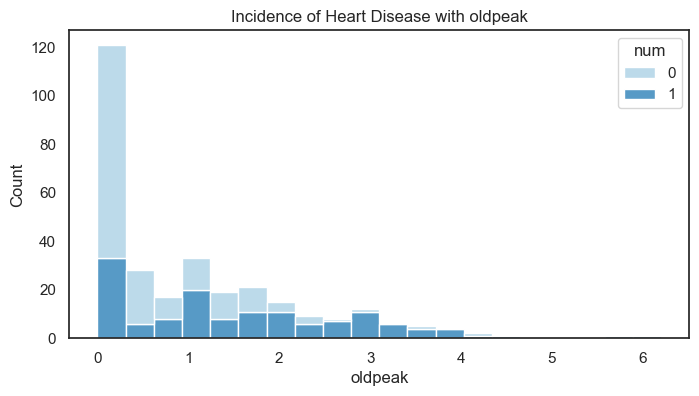

In [30]:
plt.figure(figsize=(8, 4))
sns.histplot(x='oldpeak', data=df, hue='num', multiple="stack", bins=20)
plt.title('Incidence of Heart Disease with oldpeak')
plt.xlabel('oldpeak')
plt.ylabel('Count')
plt.show()

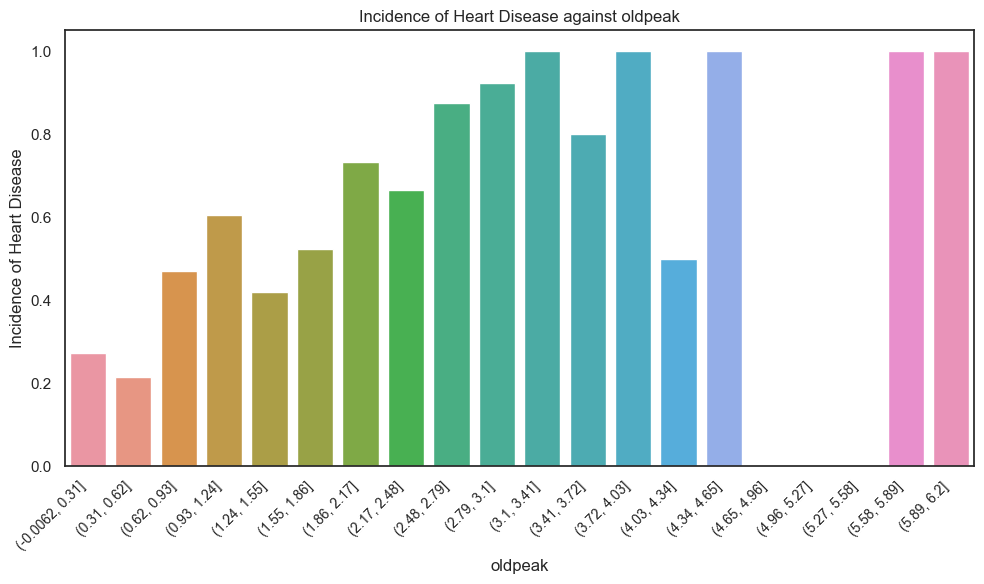

In [31]:
# Create bins for 'oldpeak'
df['oldpeak_bin'] = pd.cut(df['oldpeak'], bins=20)  # Adjust the number of bins as needed

# Calculate the average of 'num' for each 'oldpeak' bin
oldpeak_bin_avg = df.groupby('oldpeak_bin')['num'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=oldpeak_bin_avg.index.astype(str), y=oldpeak_bin_avg.values)
plt.xlabel('oldpeak')
plt.ylabel('Incidence of Heart Disease')
plt.title('Incidence of Heart Disease against oldpeak')
plt.xticks(rotation=45, ha='right', fontsize = 10)
plt.tight_layout()
plt.show()

As we saw in the correlation matrix, the higher the oldpeak, the higher the incidence rate of heart disease. But we also observe that sample size rapidly decreases with the increase in oldpeak, which means that not many patients have high oldpeak.

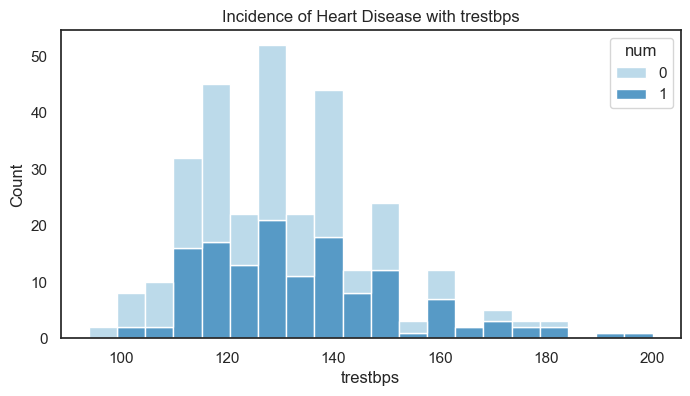

In [32]:
plt.figure(figsize=(8, 4))
sns.histplot(x='trestbps', data=df, hue='num', multiple="stack", bins=20)
plt.title('Incidence of Heart Disease with trestbps')
plt.xlabel('trestbps')
plt.ylabel('Count')
plt.show()

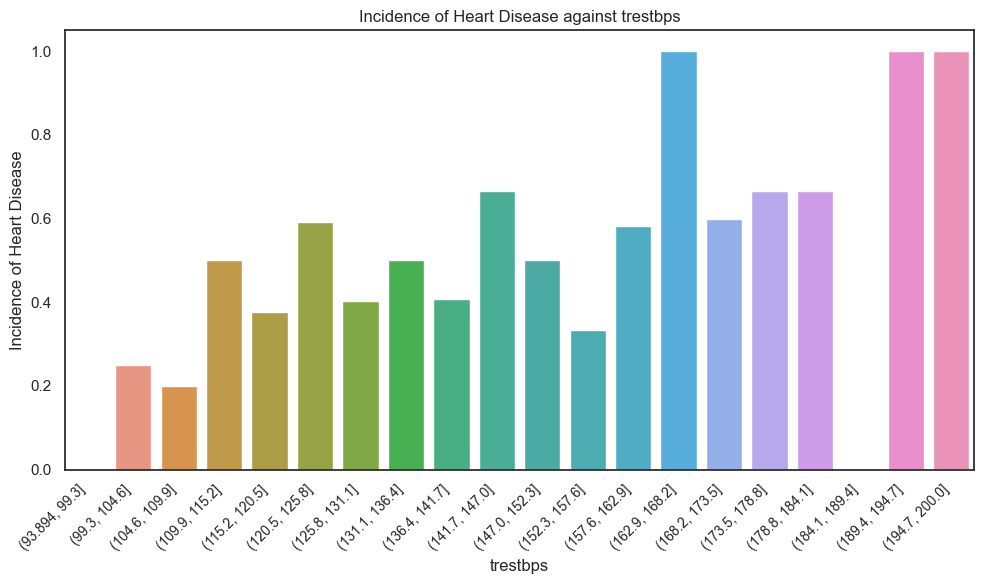

In [33]:
# Create bins for 'trestbps'
df['trestbps_bin'] = pd.cut(df['trestbps'], bins=20)  # Adjust the number of bins as needed

# Calculate the average of 'num' for each 'trestbps' bin
trestbps_bin_avg = df.groupby('trestbps_bin')['num'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=trestbps_bin_avg.index.astype(str), y=trestbps_bin_avg.values)
plt.xlabel('trestbps')
plt.ylabel('Incidence of Heart Disease')
plt.title('Incidence of Heart Disease against trestbps')
plt.xticks(rotation=45, ha='right', fontsize = 10)
plt.tight_layout()
plt.show()

Just like what we saw in the correlation matrix, while there is a positive correlation between trestbps and heart disease incidence, the value is not high. So as trestbps increases, heart disease incidence rate increases but the correlation is not as obvious.

### Categorical Features

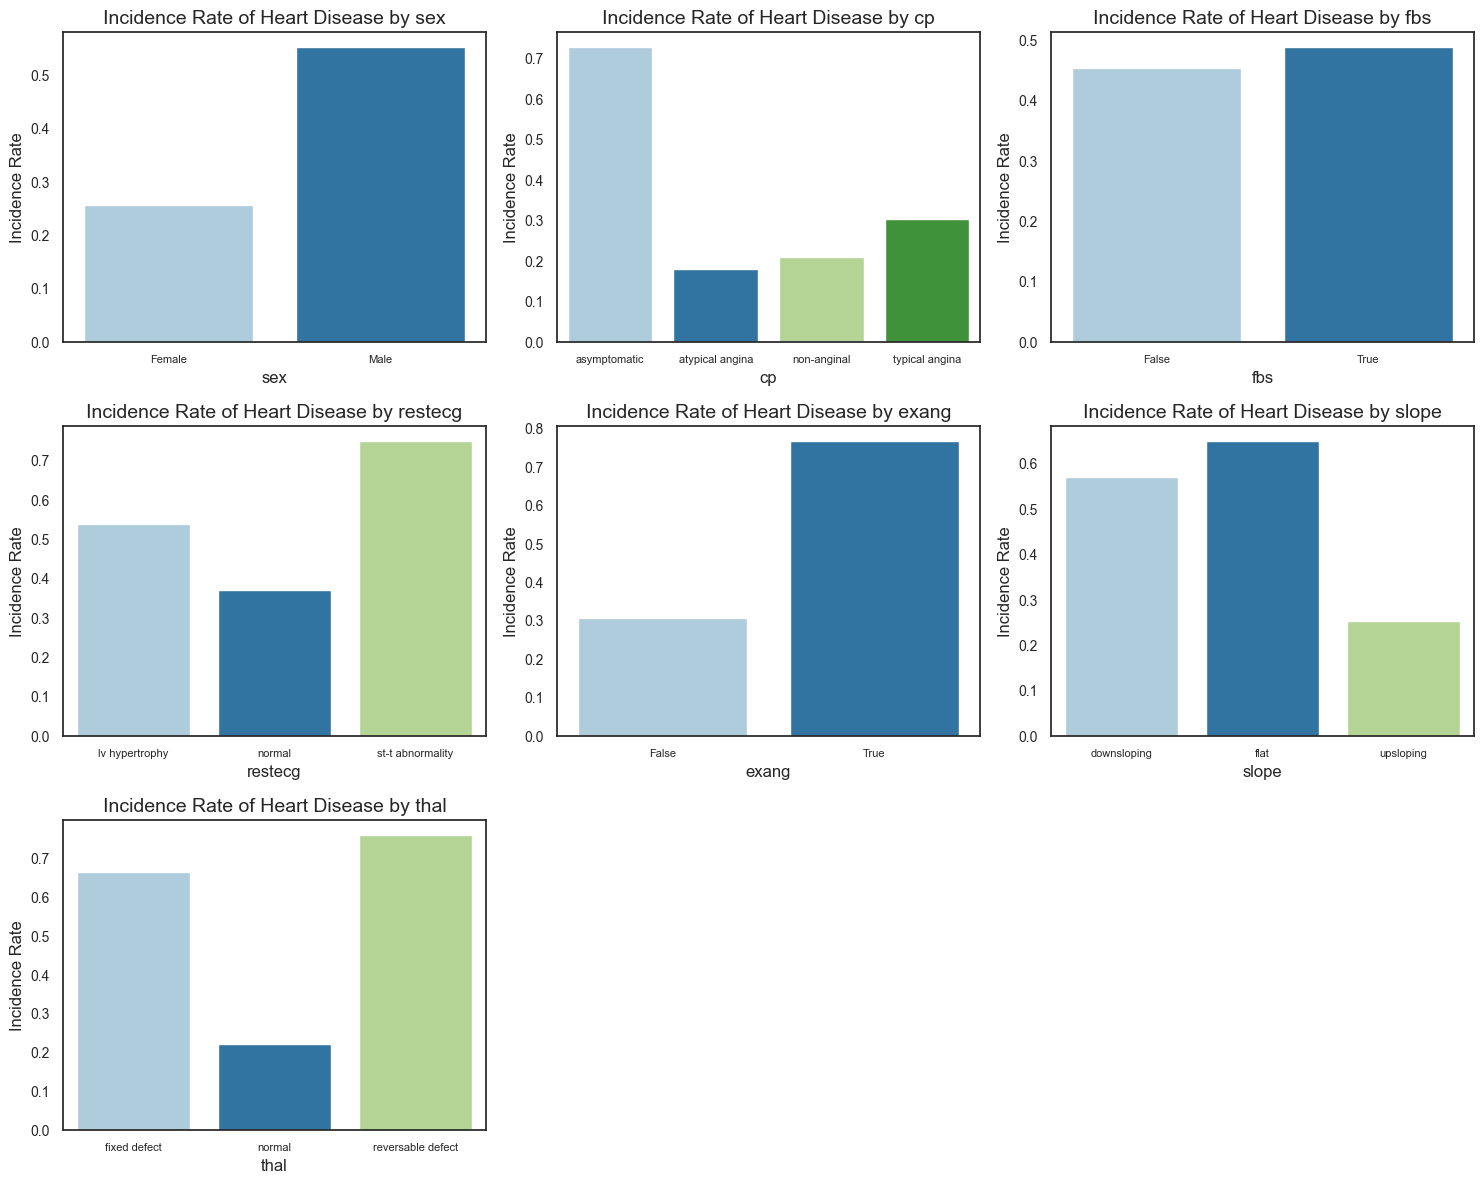

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Iterate through categorical features and create bar plots
categorical_cols = list(categorical_features.columns)
for i, col in enumerate(categorical_cols):
    row = i // 3
    col_num = i % 3

    # Calculate incidence rate for each category
    incidence_rates = df.groupby(col)['num'].mean()

    sns.barplot(x=incidence_rates.index, y=incidence_rates.values, ax=axes[row, col_num])

    # Set titles and labels with specific font sizes
    axes[row, col_num].set_title(f'Incidence Rate of Heart Disease by {col}', fontsize=14)
    axes[row, col_num].set_xlabel(col, fontsize=12)
    axes[row, col_num].set_ylabel('Incidence Rate', fontsize=12)

    # Adjust tick parameters for font size
    axes[row, col_num].tick_params(axis='x', labelsize=8)
    axes[row, col_num].tick_params(axis='y', labelsize=10)

# Remove empty subplot if there are fewer than 9 categorical features
if len(categorical_cols) < 9:
    for i in range(len(categorical_cols), 9):
        row = i // 3
        col_num = i % 3
        fig.delaxes(axes[row, col_num])

plt.tight_layout()
plt.show()


Insights from the plots above:
*   Males have disprotionately higher heart disease incidence rate compared to females
*   Asymptomatic cp proves to be a very strong indicator among the 4 types of cp categories
*   fbs is not a strong indicator for heart disesase incidence
*   restecg has some level of correlation where having normal ecg results points to lower chance of heartdisease
*   exang which is exercise induced angina is highly correlated with heart disease incidence; having exercise induced angina leads to almost 80% chance hear disease
*   for slope, upsloping is correlated with low heart disease incidence
*   for thal, fixed and reversable defects also point to higher heart disease incidence







## Relationship between features

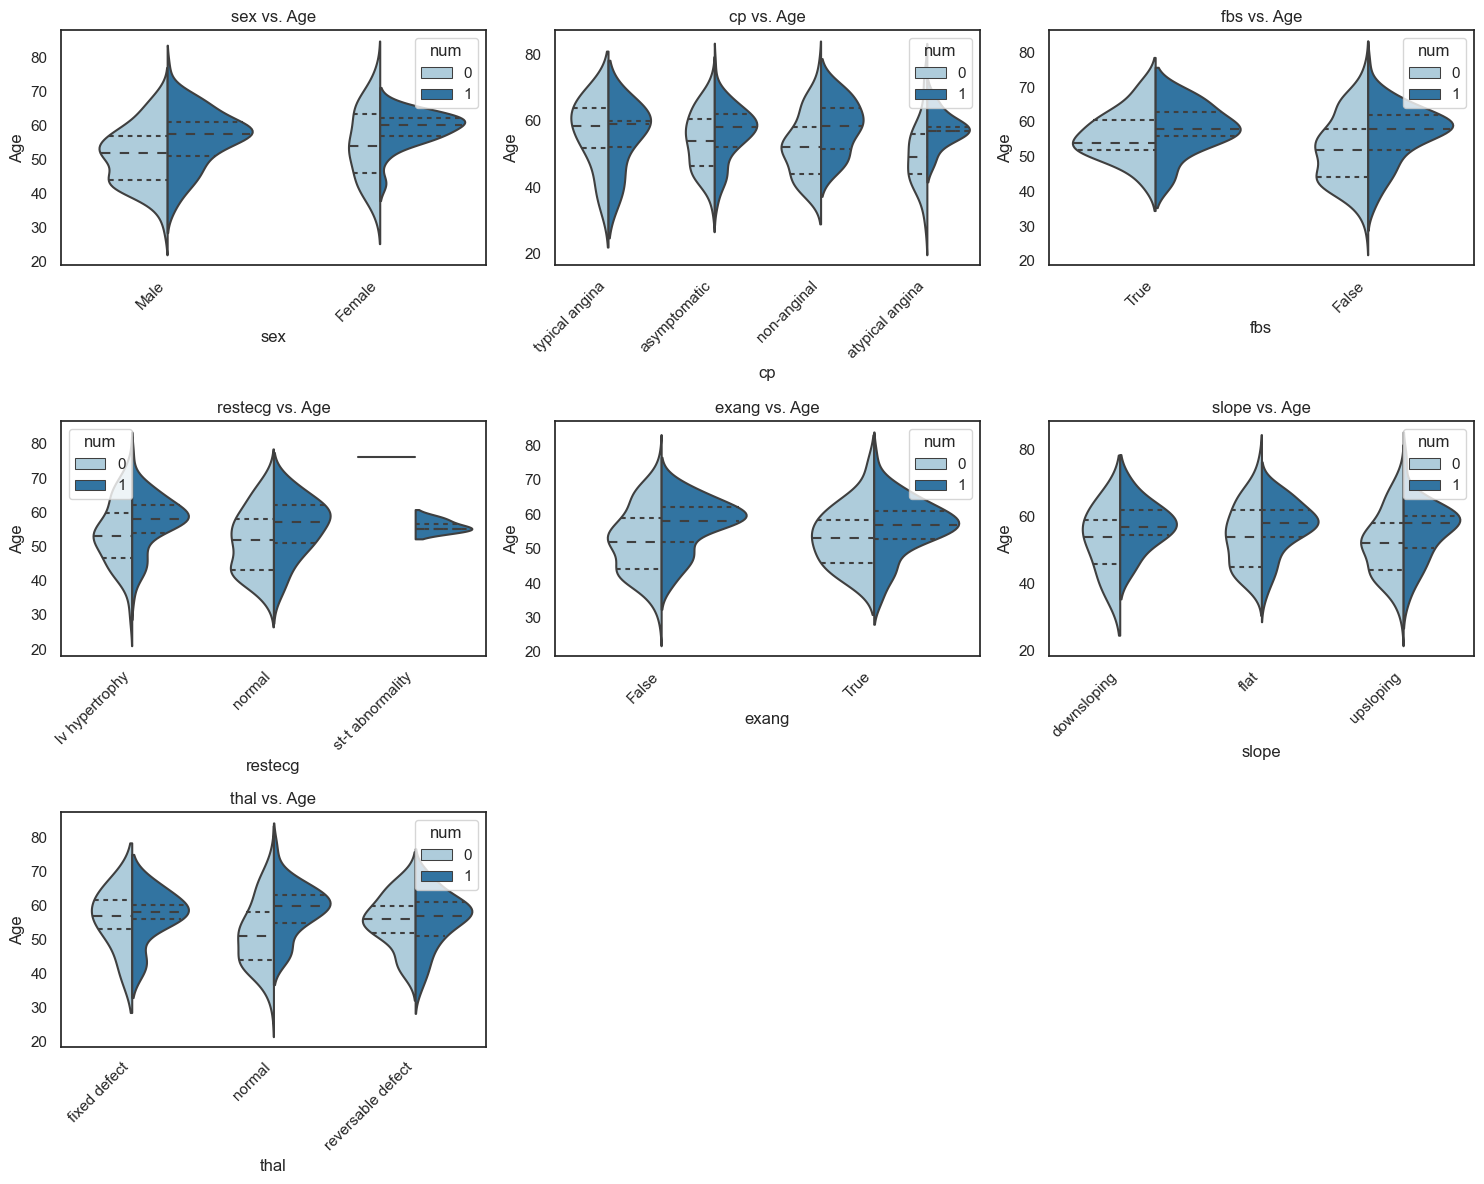

In [35]:
#plot categorical features vs age
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(
        x=col,
        y='age',
        hue='num',
        data=df,
        split=True,
        inner='quart',
        scale='area'  # Scale violins to be same area
    )
    plt.title(f'{col} vs. Age')
    plt.xlabel(col)
    plt.ylabel('Age')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

There are a couple of observations from the above plots:
*   Typical occurs more as people age
*   Normal and lv hypertrophy restecg is more common among younger people
*   Exang distribution looks similar across age whether true or false
*   Fixed defect has higher occurence among older ages



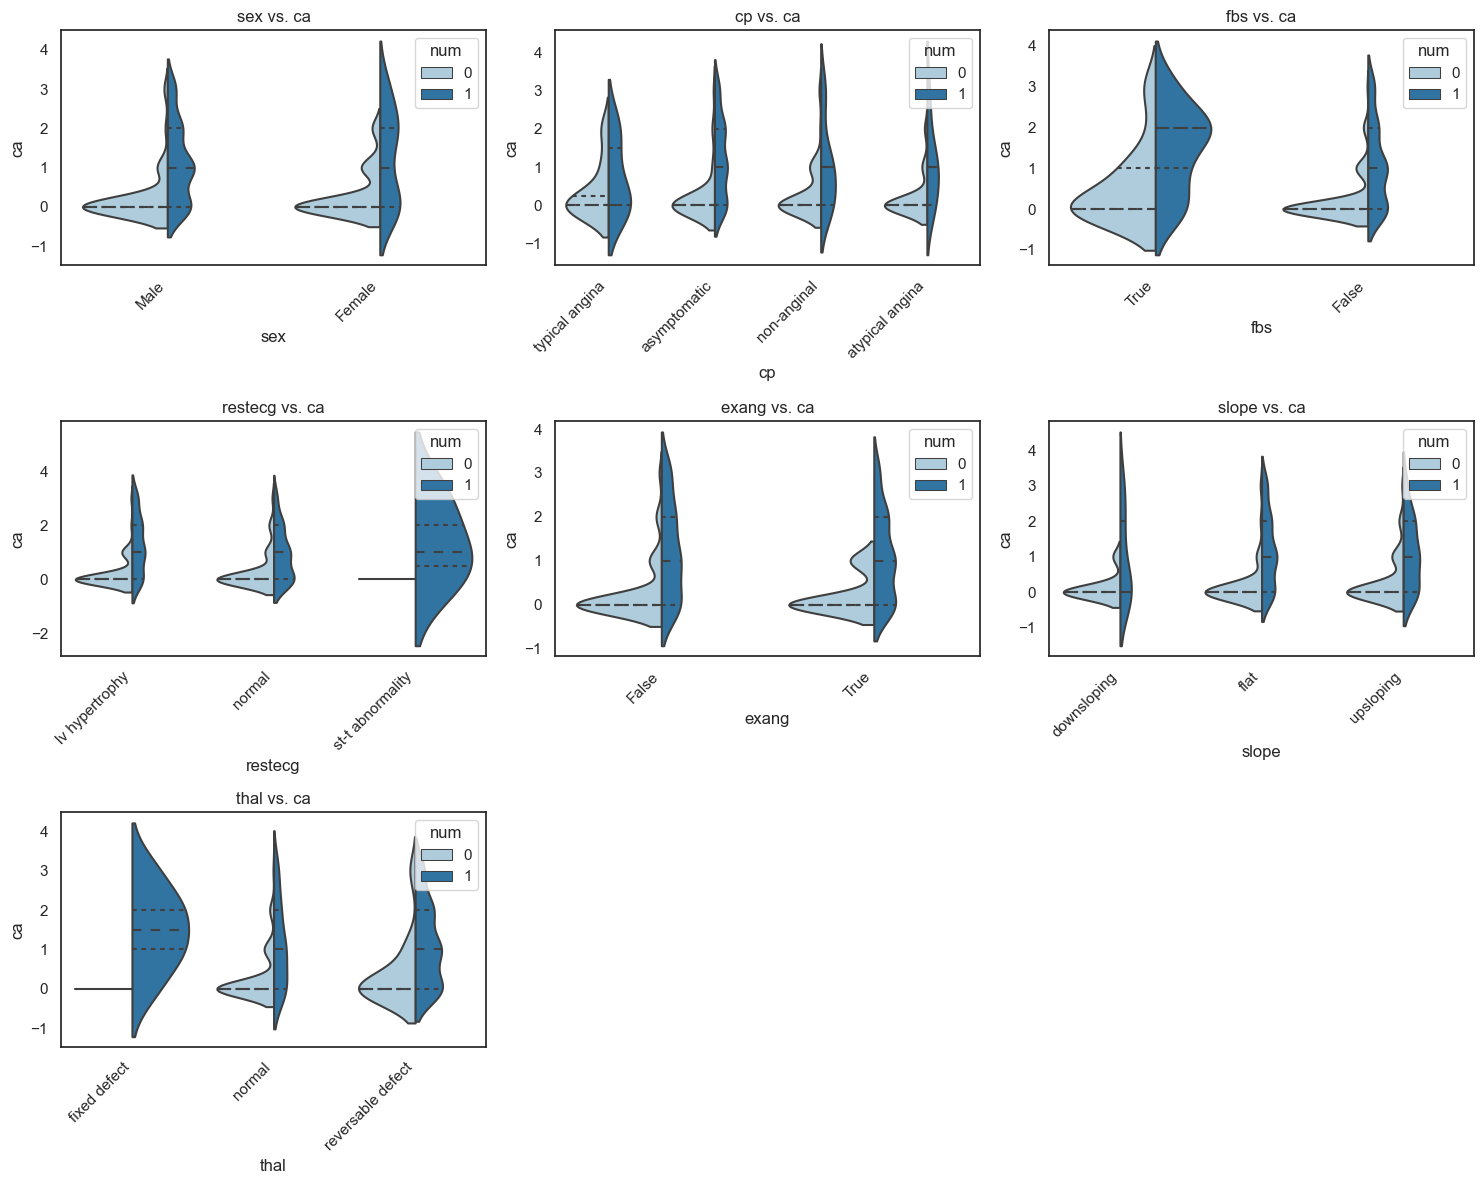

In [36]:
#plot categorical features vs ca
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(
        x=col,
        y='ca',
        hue='num',
        data=df,
        split=True,
        inner='quart',
        scale='area'  # Scale violins to be same area
    )
    plt.title(f'{col} vs. ca')
    plt.xlabel(col)
    plt.ylabel('ca')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Not much new findings made from these plots apart from:
*   Confirmation that ca has a very strong correlation with heart disease incidence, the top of the normal distributions occur at ca = 0 on almost all plots where num = 0



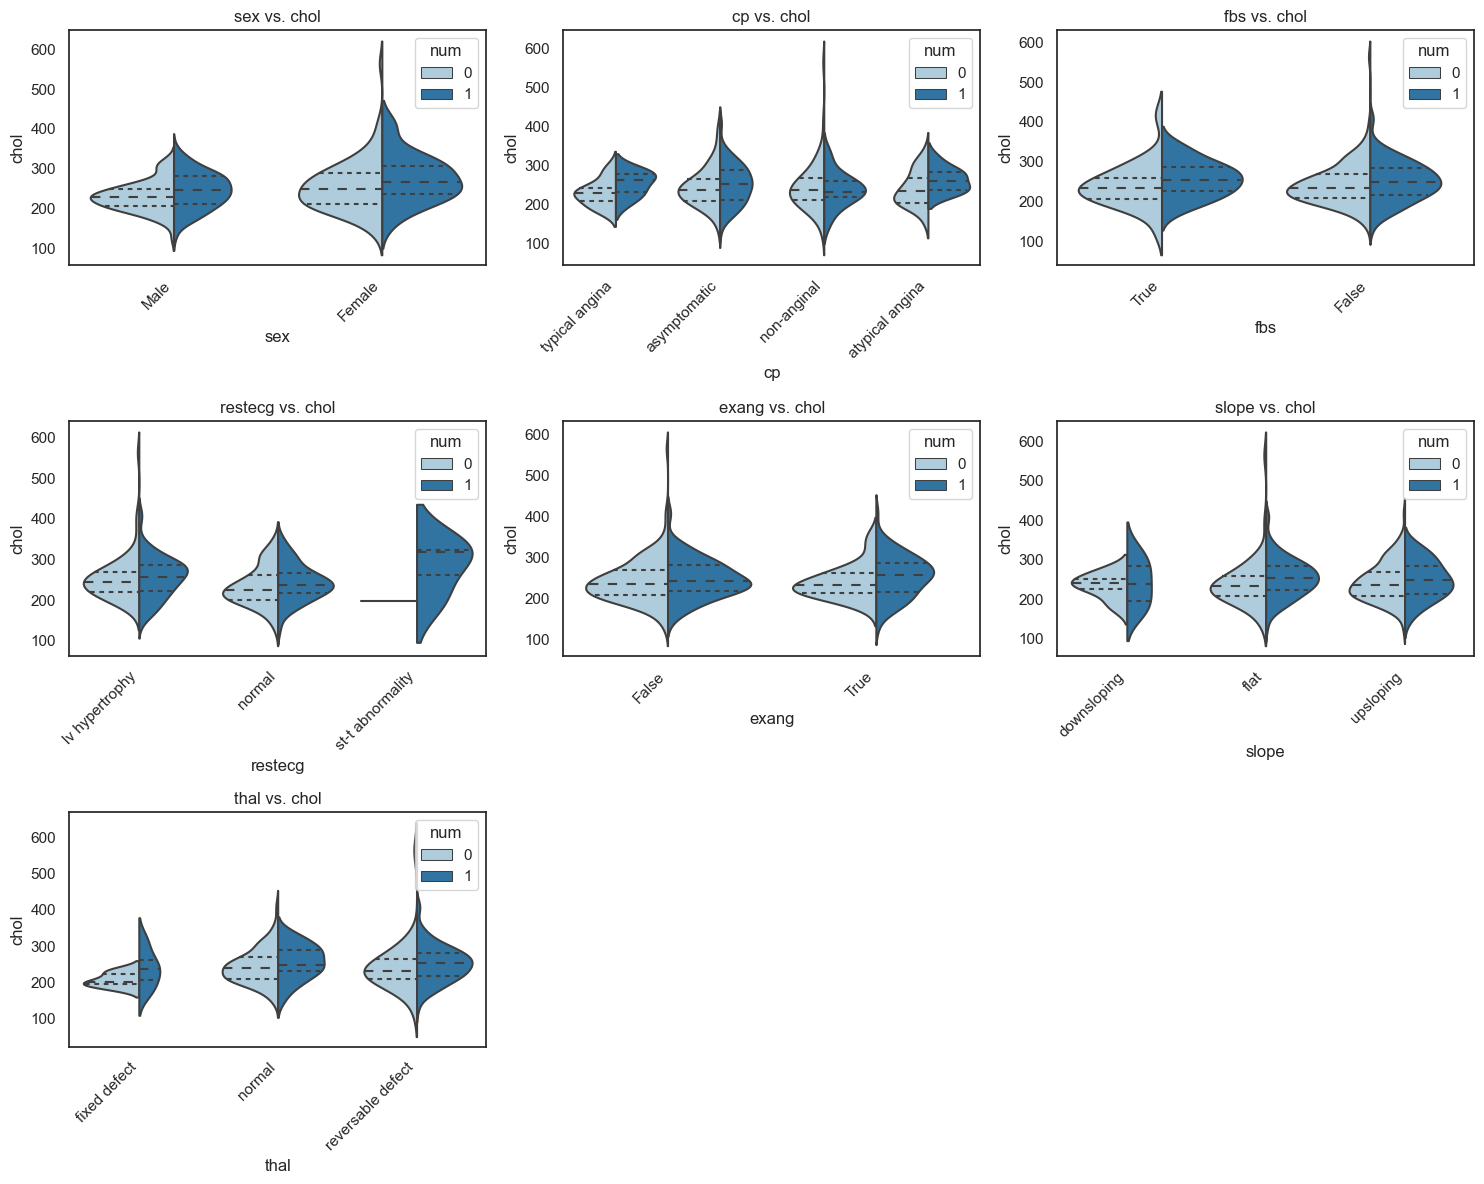

In [37]:
#plot categorical features vs chol
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(
        x=col,
        y='chol',
        hue='num',
        data=df,
        split=True,
        inner='quart',
        scale='area'  # Scale violins to be same area
    )
    plt.title(f'{col} vs. chol')
    plt.xlabel(col)
    plt.ylabel('chol')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Findings from the above plots:
*   For fixed defect (thal), chol must be much lower for num to be 0 compared to normal and reversable defect



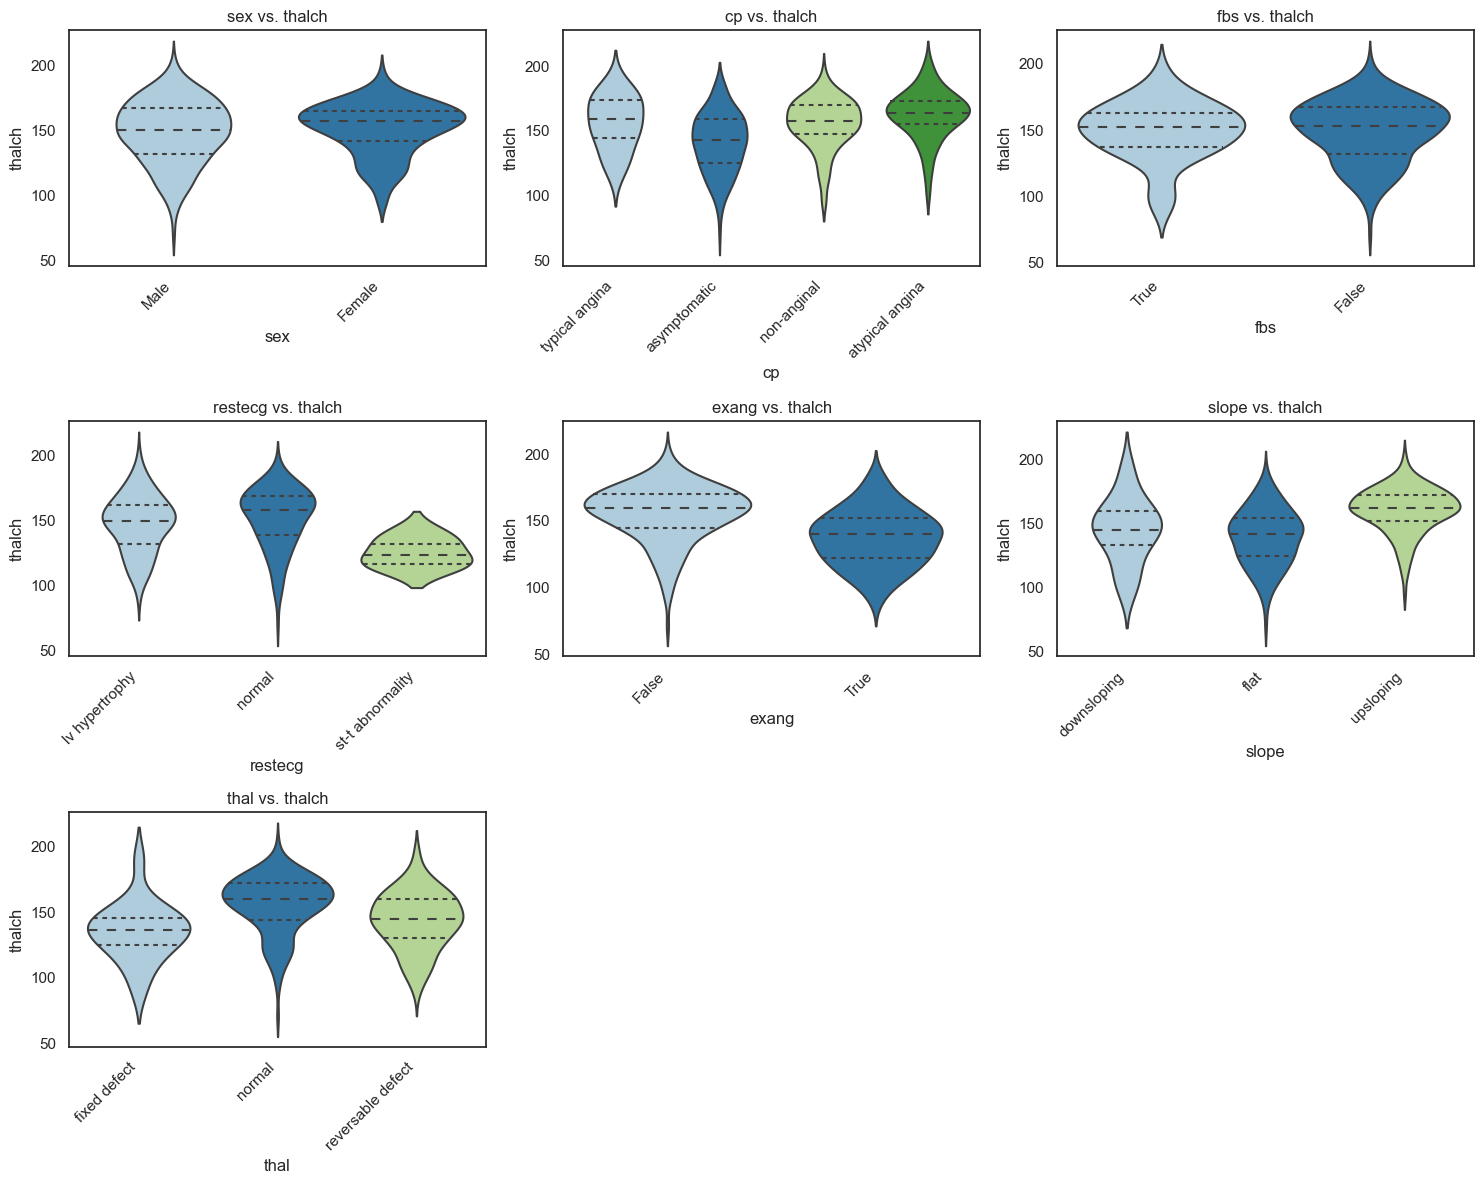

In [38]:
#plot categorical features vs thalch
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(
        x=col,
        y='thalch',
        # hue='num',
        data=df,
        split=True,
        inner='quart',
        scale='area'  # Scale violins to be same area
    )
    plt.title(f'{col} vs. thalch')
    plt.xlabel(col)
    plt.ylabel('thalch')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

There are a couple of observations from the above plots:
*   Females have slightly higher thalch then men
*   Thalch is lower in asymptomatic angina compared to the rest
*   Thalch slightly higher in false fbs
*   Thalch noticeably lower for st-t abnormality in restecg
*   Thalch lower in true exang which make sense since true exang means angina induced by exercise
*   Thalch higher in upsloping slope compared to the other 2
*   Thalch lowest in fixed defect followed by reversable defect and normal in thal

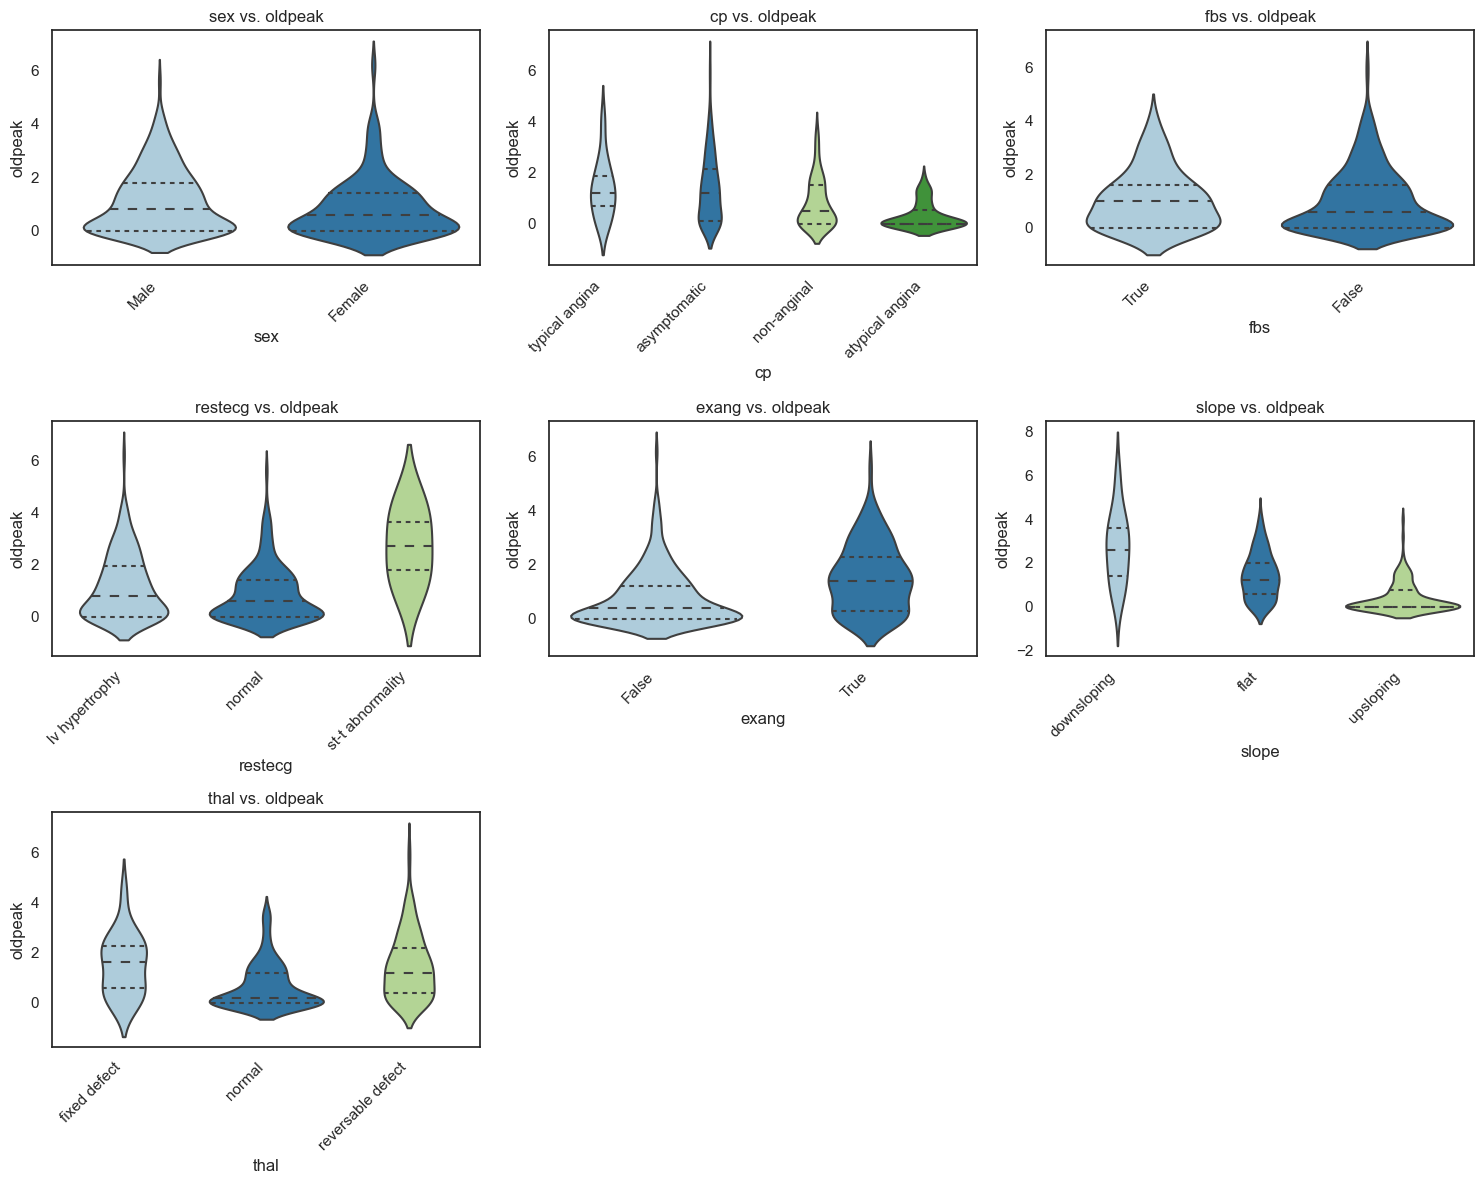

In [39]:
#plot categorical features vs oldpeak
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(
        x=col,
        y='oldpeak',
        # hue='num',
        data=df,
        split=True,
        inner='quart',
        scale='area'  # Scale violins to be same area
    )
    plt.title(f'{col} vs. oldpeak')
    plt.xlabel(col)
    plt.ylabel('oldpeak')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Observations from above:
*   Low oldpeak for atypical angina
*   Higher oldpeak in st-t abnormality for restecg
*   Higher oldpeak for true exang
*   Low oldpeak for upsloping and higher oldpeak for downsloping slope
*   Low oldpeak for normal thal



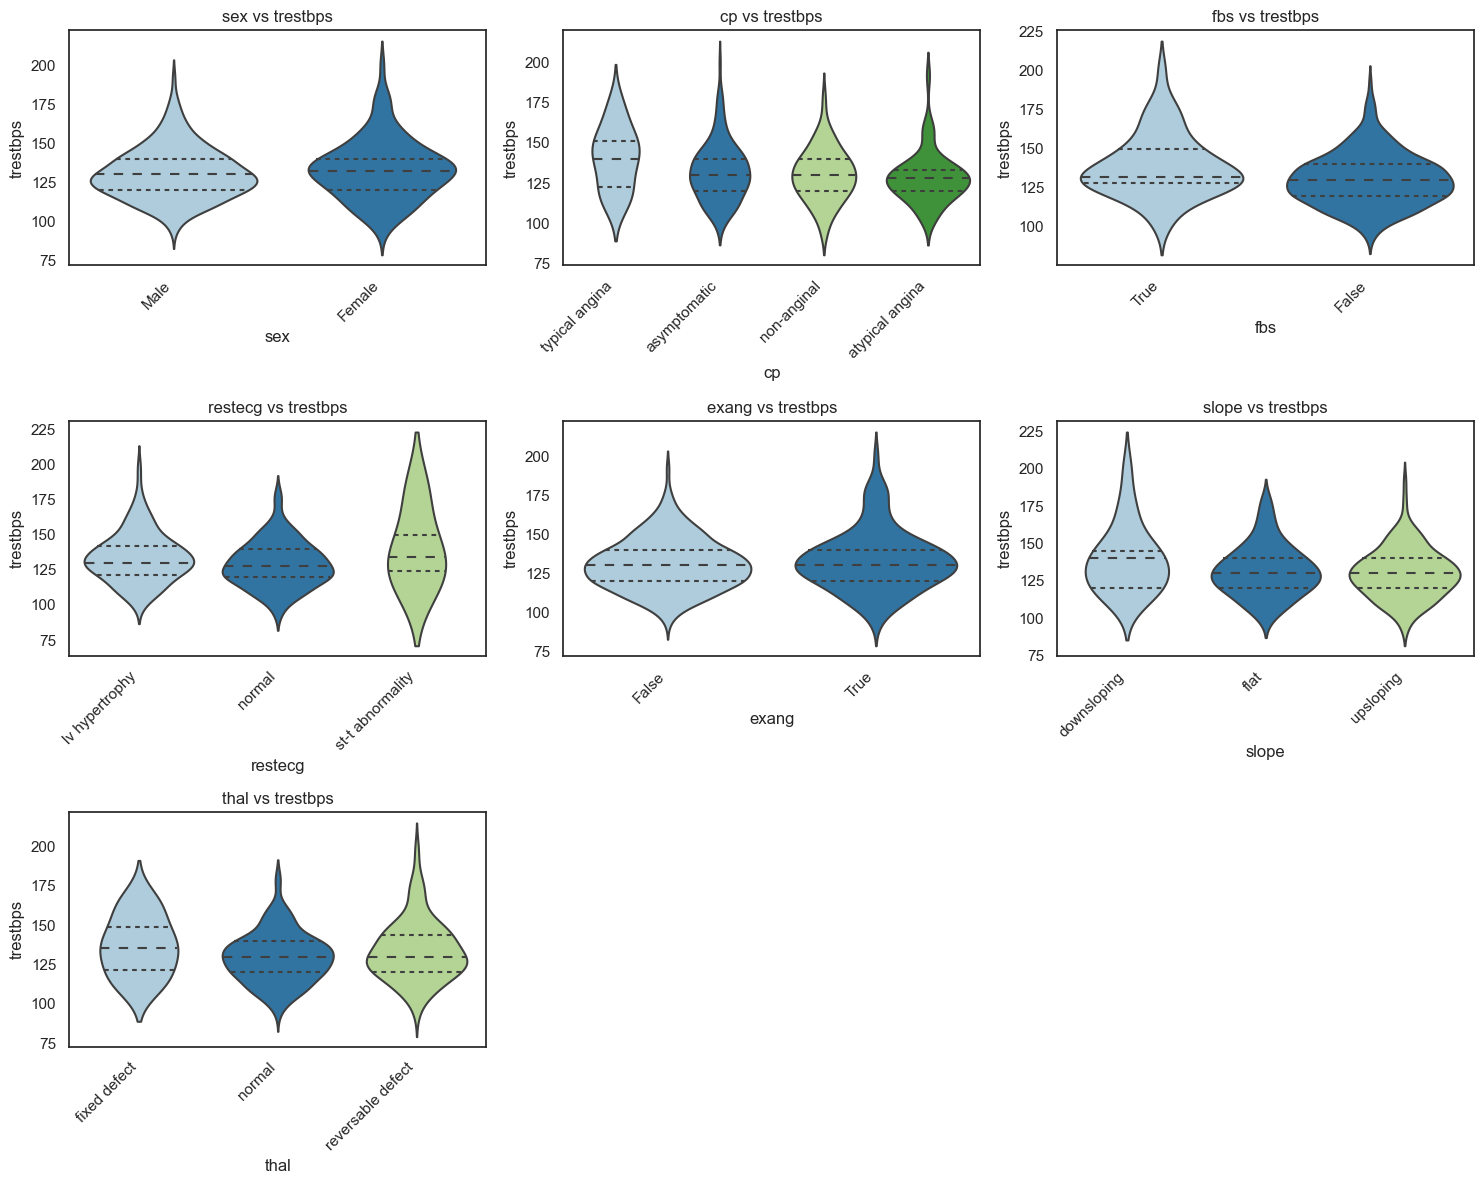

In [40]:
#plot categorical features vs trestbps
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(
        x=col,
        y='trestbps',
        # hue='num',
        data=df,
        split=True,
        inner='quart',
        scale='area'  # Scale violins to be same area
    )
    plt.title(f'{col} vs trestbps')
    plt.xlabel(col)
    plt.ylabel('trestbps')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Observations for above plots:
*   Higher trestbps for typical angina

# Preprocessing

In [41]:
# preprocessor and pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

Returning to the missing values to fix them

In [42]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing Values per column:\n", missing_values)


Missing Values per column:
 age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalch          0
exang           0
oldpeak         0
slope           0
ca              4
thal            2
num             0
age_bin         1
chol_bin        0
thalch_bin      0
oldpeak_bin     0
trestbps_bin    0
dtype: int64


In [43]:
pd.set_option('display.max_columns', 500)
df[df['ca'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_bin,chol_bin,thalch_bin,oldpeak_bin,trestbps_bin
166,52,Male,non-anginal,138,223,False,normal,169,False,0.0,upsloping,NaN,normal,0,"(49, 54]","(213.6, 235.5]","(162.7, 169.25]","(-0.0062, 0.31]","(136.4, 141.7]"
192,43,Male,asymptomatic,132,247,True,lv hypertrophy,143,True,0.1,flat,NaN,reversable defect,1,"(39, 44]","(235.5, 257.4]","(136.5, 143.05]","(-0.0062, 0.31]","(131.1, 136.4]"
287,58,Male,atypical angina,125,220,False,normal,144,False,0.4,flat,NaN,reversable defect,0,"(54, 59]","(213.6, 235.5]","(143.05, 149.6]","(0.31, 0.62]","(120.5, 125.8]"
302,38,Male,non-anginal,138,175,False,normal,173,False,0.0,upsloping,NaN,normal,0,"(34, 39]","(169.8, 191.7]","(169.25, 175.8]","(-0.0062, 0.31]","(136.4, 141.7]"


Recalling the num vs ca plot, we observed most that resulted in num = 0 corresponds with ca = 0. Hence, we will imput those values for rows 166, 287 and 302

For row 192, we will use age to determine what value to imput since age had the highest correlation with ca among all ca pairings

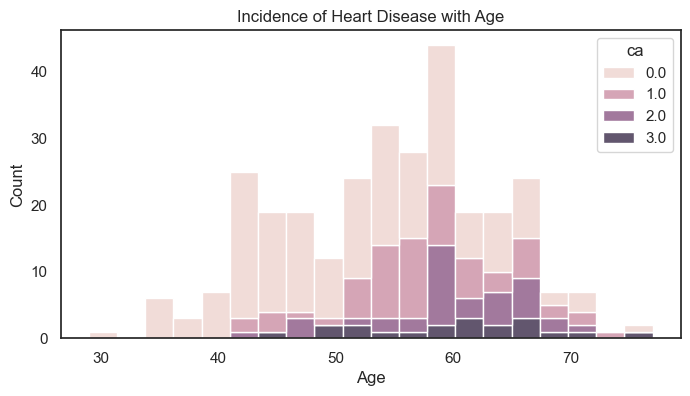

In [44]:
plt.figure(figsize=(8, 4))
sns.histplot(x='age', data=df, hue='ca', multiple="stack", bins=20)
plt.title('Incidence of Heart Disease with Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

From the plot above and knowing that the patient is 43 years old, the highest likelihood ca value for him is also 0

In [45]:
# imputing the null values with ca values
df.loc[166,'ca'] = 0.0
df.loc[192,'ca'] = 0.0
df.loc[287,'ca'] = 0.0
df.loc[302,'ca'] = 0.0

In [46]:
pd.set_option('display.max_columns', 500)
df[df['thal'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_bin,chol_bin,thalch_bin,oldpeak_bin,trestbps_bin
87,53,Female,non-anginal,128,216,False,lv hypertrophy,115,False,0.0,upsloping,0.0,NaN,0,"(49, 54]","(213.6, 235.5]","(110.3, 116.85]","(-0.0062, 0.31]","(125.8, 131.1]"
266,52,Male,asymptomatic,128,204,True,normal,156,True,1.0,flat,0.0,NaN,1,"(49, 54]","(191.7, 213.6]","(149.6, 156.15]","(0.93, 1.24]","(125.8, 131.1]"


Based on our prior findings in the categoircal features analysis, we will imput row 87 with normal since num = 0 and imput row 266 with reversable defect

In [47]:
# imputing the null values with thal values
df.loc[87,'thal'] = 'normal'
df.loc[266,'thal'] = 'reversable defect'

In [48]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'age_bin', 'chol_bin',
       'thalch_bin', 'oldpeak_bin', 'trestbps_bin'],
      dtype='object')

In [49]:
dataset = df.copy()
age_bin_index = dataset.columns.get_loc('age_bin')

# Drop the 'age_bin' column and all subsequent columns
dataset = dataset.iloc[:, :age_bin_index]

In [50]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160,286,False,lv hypertrophy,108,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120,229,False,lv hypertrophy,129,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130,250,False,normal,187,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130,204,False,lv hypertrophy,172,False,1.4,upsloping,0.0,normal,0


In [51]:
X = dataset.loc[:, 'age':'thal']  # Select columns from 'age' to 'thal'
y = dataset['num']               # Select the target column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_cols = list(categorical_features.columns)
num_cols = list(numerical_features.columns)
num_cols.remove('num')

preprocessor = ColumnTransformer([('cat', OneHotEncoder(drop='if_binary'), cat_cols),
                                  ('num', StandardScaler(), num_cols)])
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Supervised Learning Models

For this supervised modeling section, we are approaching it as a binary classification problem. The primary metric is `recall` and `precision` of the positive classes, with `F1-score` being a balance of the two. We do not want patients to be under diagnosed, neither do we want them to be over diagnosed, as both of these cases will not allow them to get suitable treatments, hence in this project, we focus on optimizing based on `F1-score` but we look at `accuracy` to pick out the best models

In [52]:
# models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# evaluations
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [53]:
def plotconfusion(model, X_test_prepared, y_test):
    # Generate predictions
    y_pred = model.predict(X_test_prepared)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(5, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=True)  # Plot confusion matrix

    ax.set_title('Confusion Matrix', fontsize=14, color='black')
    ax.set_xlabel('Predicted Label', fontsize=12, color='black')
    ax.set_ylabel('True Label', fontsize=12, color='black')
    ax.tick_params(axis='x', labelsize=10, rotation=0)
    ax.tick_params(axis='y', labelsize=10)
    plt.show()

## Baseline Models without cross validation

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



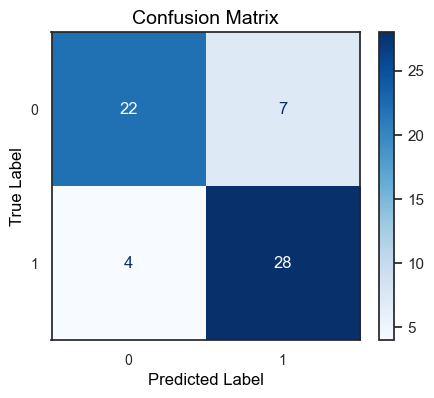

In [54]:
# Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', random_state=42)  # Use a suitable solver
logreg_model.fit(X_train_prepared, y_train)

y_pred_logreg = logreg_model.predict(X_test_prepared)
print(classification_report(y_test, y_pred_logreg))
plotconfusion(logreg_model, X_test_prepared, y_test)

              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.74      0.78      0.76        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



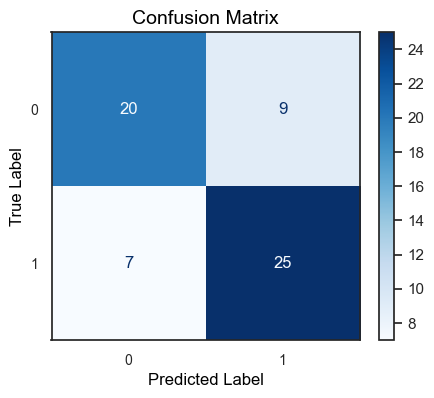

In [55]:
# Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_prepared, y_train)

y_pred_tree = tree_model.predict(X_test_prepared)
print(classification_report(y_test, y_pred_tree))
plotconfusion(tree_model, X_test_prepared, y_test)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



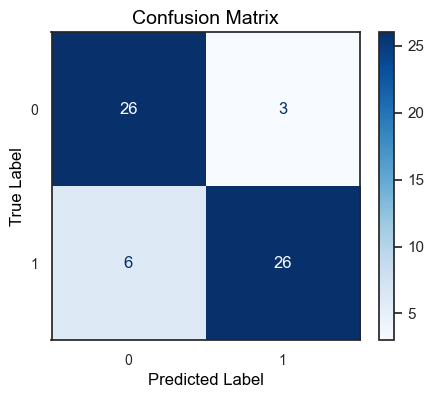

In [56]:
# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_prepared, y_train)

y_pred_rf = rf_model.predict(X_test_prepared)
print(classification_report(y_test, y_pred_rf))
plotconfusion(rf_model, X_test_prepared, y_test)

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



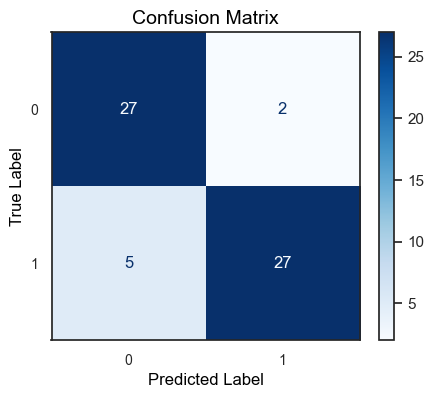

In [57]:
# SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_prepared, y_train)

y_pred_svm = svm_model.predict(X_test_prepared)
print(classification_report(y_test, y_pred_svm))
plotconfusion(svm_model, X_test_prepared, y_test)

In [58]:
# summarising accuracies
models = {
    'Logistic Regression': (y_test, y_pred_logreg),
    'Decision Tree': (y_test, y_pred_tree),
    'Random Forest': (y_test, y_pred_rf),
    'SVM': (y_test, y_pred_svm)
}

for model_name, (y_true, y_pred) in models.items():
  print(f"Classification report for {model_name}:")
  report = classification_report(y_true, y_pred)
  print(report)
  # Extract and print the accuracy
  report_lines = report.split('\n')
  for line in report_lines:
      if "accuracy" in line:
          accuracy = line.split()[1]  # Get the accuracy value
          print(f"Accuracy for {model_name}: {accuracy}")
          break # Stop once we have found the line containing accuracy
  print("-" * 40)

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Accuracy for Logistic Regression: 0.82
----------------------------------------
Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.74      0.78      0.76        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

Accuracy for Decision Tree: 0.74
----------------------------------------
Classification report for Random Forest:
              precision    recall  f1-score   support

        

With just the baseline models, we notice that the performance of the models are already performing quite comparable to the results seen in literature on the same Cleveland dataset. Similarly, the better results in literature are also from Logistic Regression and SVM. There are a couple of results which are 92% and 94% accuracy. But in our search random forest does quite well too at 85% accuracy.

We will go through hyperparameter tuning and cross validation to improve on the models before selecting the best models

## Models with Cross Validation

CV Scores: [0.83673469 0.87755102 0.79166667 0.85416667 0.89583333]
Mean CV Accuracy: 0.851190476190476
Test Accuracy: 0.819672131147541
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Best Parameters: {'C': 100, 'solver': 'lbfgs'}
Best CV Accuracy: 0.859608843537415
Test Accuracy (Best Model): 0.819672131147541
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



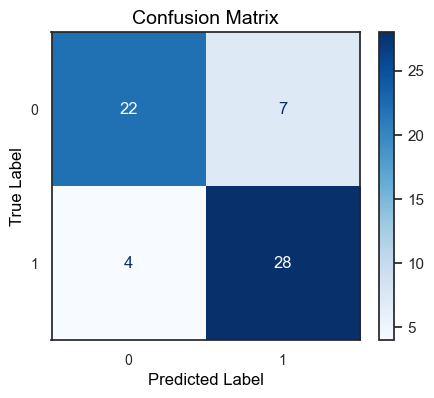

In [59]:
# Cross-validation with Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)
cv_scores = cross_val_score(logreg, X_train_prepared, y_train, cv=5, scoring='accuracy')
print("CV Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Fit and evaluate model
logreg.fit(X_train_prepared, y_train)
y_pred = logreg.predict(X_test_prepared)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_prepared, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_prepared)
print("Test Accuracy (Best Model):", accuracy_score(y_test, y_pred_best))
print("Classification Report (Best Model):\n", classification_report(y_test, y_pred_best))
plotconfusion(best_model, X_test_prepared, y_test)

Comparing against the baseline model, there wasn't any improvement in the results.

Decision Tree CV Scores: [0.6122449  0.81632653 0.70833333 0.75       0.60416667]
Decision Tree Mean CV Accuracy: 0.6982142857142857


Decision Tree Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Best CV Accuracy: 0.7355442176870748
Decision Tree Test Accuracy (Best Model): 0.7377049180327869
Decision Tree Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.69      0.83      0.75        29
           1       0.81      0.66      0.72        32

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



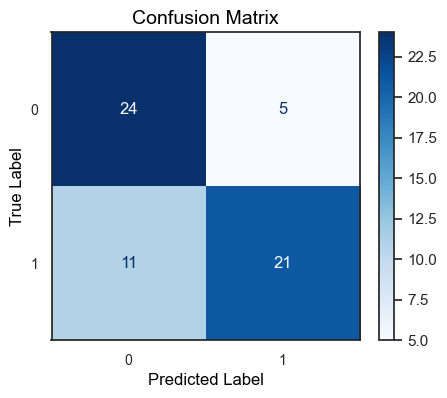

In [60]:
# Decision Tree with cross-validation
tree_model_cv = DecisionTreeClassifier(random_state=42)
cv_scores_tree = cross_val_score(tree_model_cv, X_train_prepared, y_train, cv=5, scoring='accuracy')
print("Decision Tree CV Scores:", cv_scores_tree)
print("Decision Tree Mean CV Accuracy:", np.mean(cv_scores_tree))

# Hyperparameter tuning for Decision Tree
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train_prepared, y_train)

print("Decision Tree Best Parameters:", grid_search_tree.best_params_)
print("Decision Tree Best CV Accuracy:", grid_search_tree.best_score_)

# Evaluate best Decision Tree model
best_tree_model = grid_search_tree.best_estimator_
y_pred_best_tree = best_tree_model.predict(X_test_prepared)
print("Decision Tree Test Accuracy (Best Model):", accuracy_score(y_test, y_pred_best_tree))
print("Decision Tree Classification Report (Best Model):\n", classification_report(y_test, y_pred_best_tree))
plotconfusion(best_tree_model, X_test_prepared, y_test)

Similarly there was not much improvement to the DT model compared to the baseline. Accuracy remains at 74% and only the F1 Score changed. It runs less risk of false positives but instead picks up more false negatives. There might be an inherent issue with DT models for this dataset which only has 303 samples which might not allow for deep enough a tree.

Random Forest CV Scores: [0.71428571 0.83673469 0.79166667 0.83333333 0.83333333]
Random Forest Mean CV Accuracy: 0.8018707482993197
Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best CV Accuracy: 0.8386054421768707
Random Forest Test Accuracy (Best Model): 0.8852459016393442
Random Forest Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



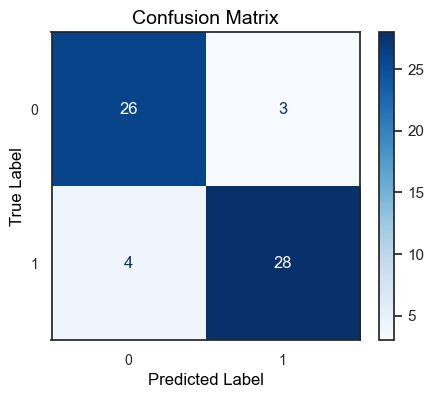

In [61]:
# Random Forest with Cross-Validation
rf_model_cv = RandomForestClassifier(random_state=42)
cv_scores_rf = cross_val_score(rf_model_cv, X_train_prepared, y_train, cv=5, scoring='accuracy')
print("Random Forest CV Scores:", cv_scores_rf)
print("Random Forest Mean CV Accuracy:", np.mean(cv_scores_rf))

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_prepared, y_train)

print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best CV Accuracy:", grid_search_rf.best_score_)

# Evaluate best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_prepared)
print("Random Forest Test Accuracy (Best Model):", accuracy_score(y_test, y_pred_best_rf))
print("Random Forest Classification Report (Best Model):\n", classification_report(y_test, y_pred_best_rf))
plotconfusion(best_rf_model, X_test_prepared, y_test)

It was surprising to see an improvement to the random forest method since it already did well on its baseline model at 85%. But its accuracy in the best model has improved to 89%.

SVM CV Scores: [0.81632653 0.83673469 0.79166667 0.83333333 0.8125    ]
SVM Mean CV Accuracy: 0.8181122448979593
SVM Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}
SVM Best CV Accuracy: 0.8635204081632653
SVM Test Accuracy (Best Model): 0.819672131147541
SVM Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



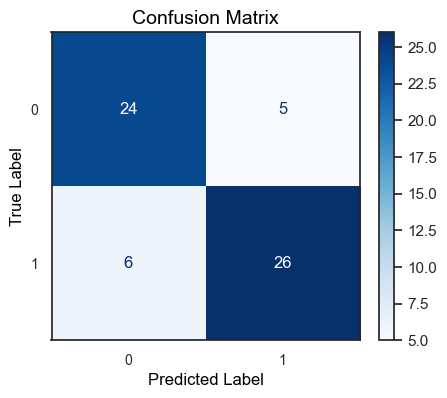

In [62]:
# SVM model with cross-validation
svm_model_cv = SVC(random_state=42)
cv_scores_svm = cross_val_score(svm_model_cv, X_train_prepared, y_train, cv=5, scoring='accuracy')
print("SVM CV Scores:", cv_scores_svm)
print("SVM Mean CV Accuracy:", np.mean(cv_scores_svm))

# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_prepared, y_train)

print("SVM Best Parameters:", grid_search_svm.best_params_)
print("SVM Best CV Accuracy:", grid_search_svm.best_score_)

# Evaluate best SVM model
best_svm_model = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test_prepared)
print("SVM Test Accuracy (Best Model):", accuracy_score(y_test, y_pred_best_svm))
print("SVM Classification Report (Best Model):\n", classification_report(y_test, y_pred_best_svm))
plotconfusion(best_svm_model, X_test_prepared, y_test)

We noticed that the performance of the model dropped after adding the cross-validation step. We noticed that while the sigmoid kernel SVM method works best on the cross-validation step, it underperforms on the test set.
We change this back to the default rbf kernel and run the cross-validation on the other parameters again.

SVM CV Scores: [0.81632653 0.83673469 0.79166667 0.83333333 0.8125    ]
SVM Mean CV Accuracy: 0.8181122448979593
SVM Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Best CV Accuracy: 0.8388605442176871
SVM Test Accuracy (Best Model): 0.9016393442622951
SVM Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



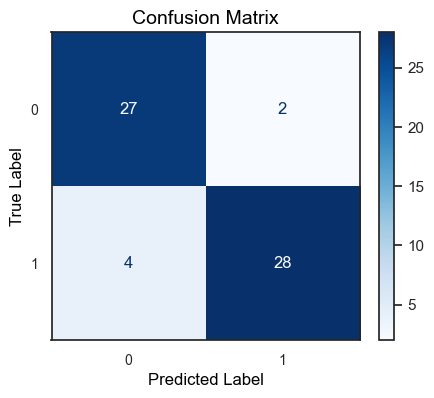

In [63]:
# SVM model with cross-validation
svm_model_cv = SVC(random_state=42)
cv_scores_svm = cross_val_score(svm_model_cv, X_train_prepared, y_train, cv=5, scoring='accuracy')
print("SVM CV Scores:", cv_scores_svm)
print("SVM Mean CV Accuracy:", np.mean(cv_scores_svm))

# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_prepared, y_train)

print("SVM Best Parameters:", grid_search_svm.best_params_)
print("SVM Best CV Accuracy:", grid_search_svm.best_score_)

# Evaluate best SVM model
best_svm_model = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test_prepared)
print("SVM Test Accuracy (Best Model):", accuracy_score(y_test, y_pred_best_svm))
print("SVM Classification Report (Best Model):\n", classification_report(y_test, y_pred_best_svm))
plotconfusion(best_svm_model, X_test_prepared, y_test)

This time the model improved from the baseline model; achieving an accuracy of 90% which is an imrpovement from the baseline model accuracy of 89%.

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Accuracy for Logistic Regression: 0.819672131147541


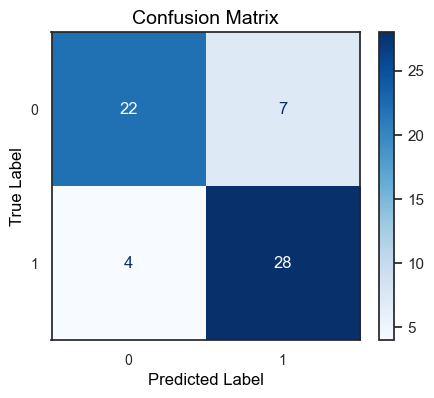

----------------------------------------
Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        29
           1       0.81      0.66      0.72        32

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61

Accuracy for Decision Tree: 0.7377049180327869


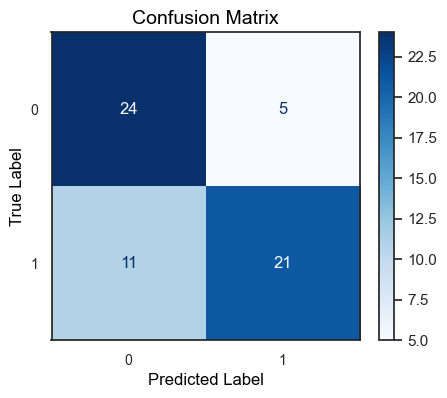

----------------------------------------
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Accuracy for Random Forest: 0.8852459016393442


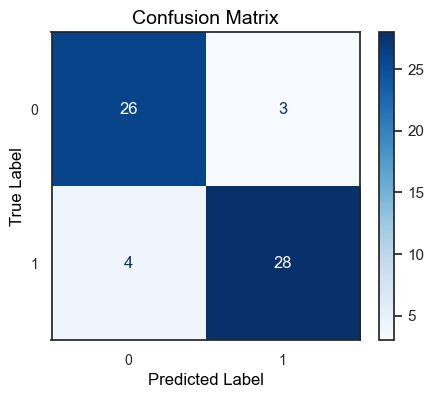

----------------------------------------
Classification report for SVM:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Accuracy for SVM: 0.9016393442622951


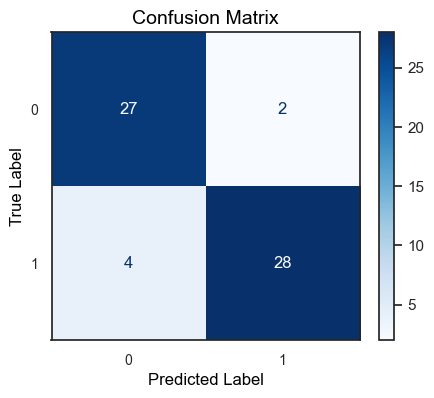

----------------------------------------


In [64]:
# comparing against all the best models from each model type
models_cv = {
    'Logistic Regression': (y_test, best_model.predict(X_test_prepared)),
    'Decision Tree': (y_test, best_tree_model.predict(X_test_prepared)),
    'Random Forest': (y_test, best_rf_model.predict(X_test_prepared)),
    'SVM': (y_test, best_svm_model.predict(X_test_prepared))
}

for model_name, (y_true, y_pred) in models_cv.items():
  print(f"Classification report for {model_name}:")
  report = classification_report(y_true, y_pred)
  print(report)
  accuracy = accuracy_score(y_true, y_pred)
  print(f"Accuracy for {model_name}: {accuracy}")

  plotconfusion(best_model if model_name == "Logistic Regression" else best_tree_model if model_name == "Decision Tree" else best_rf_model if model_name == "Random Forest" else best_svm_model, X_test_prepared, y_test)

  print("-" * 40)

After looking at the above model results once again, we arrive at the conclusion that of all the 4 types of models, the best model comes from SVM with RBF kernel which has a 90% accuracy score; F1 Scores of 90% for both 0 and 1 in the target value. This means to say that the precision and recall are conistently high; being able to accurately identify both true positive and true negatives.

90% is also very close to the accuracy scores seen in literature: https://pmc.ncbi.nlm.nih.gov/articles/PMC10378171/table/diagnostics-13-02392-t004/

## Neural Networks

In [68]:
print("Shape of X_train_split:", X_train_split.shape)

Shape of X_train_split: (217, 22)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4701 - loss: 0.7042 - val_accuracy: 0.6400 - val_loss: 0.6484
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6315 - loss: 0.6385 - val_accuracy: 0.7600 - val_loss: 0.5899
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6953 - loss: 0.6132 - val_accuracy: 0.8000 - val_loss: 0.5395
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7343 - loss: 0.5768 - val_accuracy: 0.8800 - val_loss: 0.4938
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8139 - loss: 0.5330 - val_accuracy: 0.8800 - val_loss: 0.4520
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7857 - loss: 0.5081 - val_accuracy: 0.8800 - val_loss: 0.4168
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7949 - loss: 0.4828 - val_accuracy: 0.8800 - val_loss: 0.3884
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8616 - loss: 0.4082 - val_accuracy: 0.8400 - val_loss: 0.3642
Epoch 

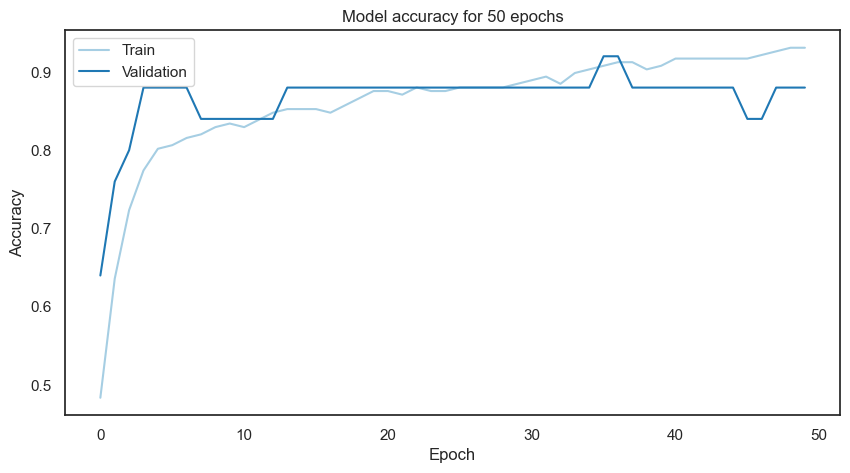

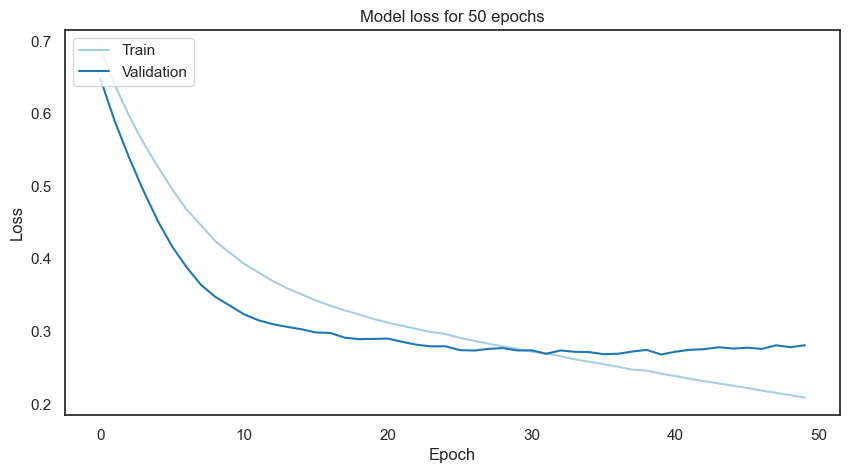

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Neural Network Accuracy: 0.819672131147541


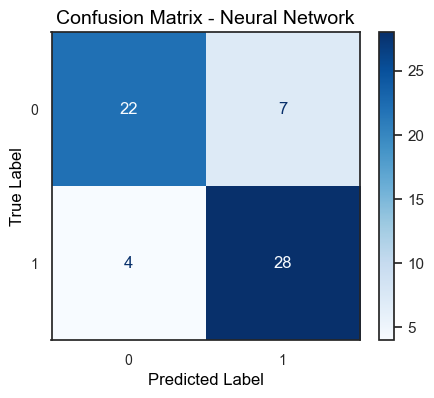

In [76]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def nn_model_gen(epochs, X_train_split, X_val, y_train_split, y_val):
    # Ensure data is in the correct format
    X_train_split = np.array(X_train_split, dtype=np.float32)
    X_val = np.array(X_val, dtype=np.float32)
    y_train_split = np.array(y_train_split, dtype=np.float32)
    y_val = np.array(y_val, dtype=np.float32)

    # Build the model
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_split.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train_split, y_train_split,
        epochs=epochs,
        batch_size=32,
        validation_data=(X_val, y_val)
    )

    return model, history


# Split the data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_prepared, y_train, test_size=0.1, random_state=42)

epochs = 50
nn_model, history = nn_model_gen(epochs, X_train_split, X_val, y_train_split, y_val)

# plot the epoch and accuracy gain
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f'Model accuracy for {epochs} epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Model loss for {epochs} epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
y_pred_prob = nn_model.predict(X_test_prepared)
y_pred = (y_pred_prob > 0.5).astype(int).flatten() # Convert probabilities to class labels

print("Neural Network Classification Report:\n", classification_report(y_test, y_pred))
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test)) # Use unique labels from y_test
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=True)  # Plot confusion matrix

ax.set_title('Confusion Matrix - Neural Network', fontsize=14, color='black')
ax.set_xlabel('Predicted Label', fontsize=12, color='black')
ax.set_ylabel('True Label', fontsize=12, color='black')
ax.tick_params(axis='x', labelsize=10, rotation=0)
ax.tick_params(axis='y', labelsize=10)
plt.show()

From the above graph, it seems like the cross validation accuracy does not improve after about 30 epochs. This means that there isn't a need to train the model for too many epochs to achieve the best test results. Let us run the algorithm again with epochs = 30.

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6678 - loss: 0.6504 - val_accuracy: 0.8400 - val_loss: 0.5386
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7329 - loss: 0.6025 - val_accuracy: 0.8400 - val_loss: 0.4812
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7788 - loss: 0.5343 - val_accuracy: 0.8400 - val_loss: 0.4298
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7903 - loss: 0.5154 - val_accuracy: 0.8800 - val_loss: 0.3886
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8210 - loss: 0.4660 - val_accuracy: 0.8800 - val_loss: 0.3554
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8083 - loss: 0.4531 - val_accuracy: 0.8800 - val_loss: 0.3294
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8475 - loss: 0.4206 - val_accuracy: 0.8800 - val_loss: 0.3092
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7911 - loss: 0.4403 - val_accuracy: 0.9200 - val_loss: 0.2949
Epoch 

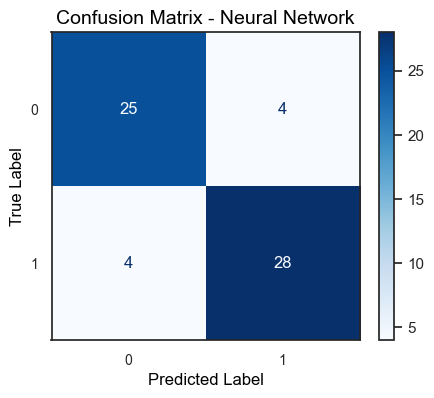

In [77]:
# define the hyperparameters of the model ie. choose epochs = 30
epochs = 30
nn_model, history = nn_model_gen(epochs, X_train_split, X_val, y_train_split, y_val)

# Evaluate the model
y_pred_prob = nn_model.predict(X_test_prepared)
y_pred = (y_pred_prob > 0.5).astype(int).flatten() # Convert probabilities to class labels

print("Neural Network Classification Report:\n", classification_report(y_test, y_pred))
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test)) # Use unique labels from y_test
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=True)  # Plot confusion matrix

ax.set_title('Confusion Matrix - Neural Network', fontsize=14, color='black')
ax.set_xlabel('Predicted Label', fontsize=12, color='black')
ax.set_ylabel('True Label', fontsize=12, color='black')
ax.tick_params(axis='x', labelsize=10, rotation=0)
ax.tick_params(axis='y', labelsize=10)
plt.show()

As we optimised the neural network, we managed to improve it to an accuracy of 87%. This could be further improved through more rigourous selection of:
*   Architecture of the neural network; as learnt in the course of study, as the number of layers and neurons grow, the model becomes more and more accurate and better at generalising to unseen data
*   The choice of validation set size and epoch size are also hyperparameters that can be further tuned.



However, that said, the current neural network model is only underperforms the SVM with RBF kernel which records an accuracy of 90%.

# Unsupervised Learning Models

## PCA - Dimensionality Reduction



In [78]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [79]:
feature_names = preprocessor.get_feature_names_out()

In [80]:
# Initialize PCA with the desired number of components
pca = PCA(n_components=len(list(feature_names)))

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_prepared)

# Transform the testing data
X_test_pca = pca.transform(X_test_prepared)


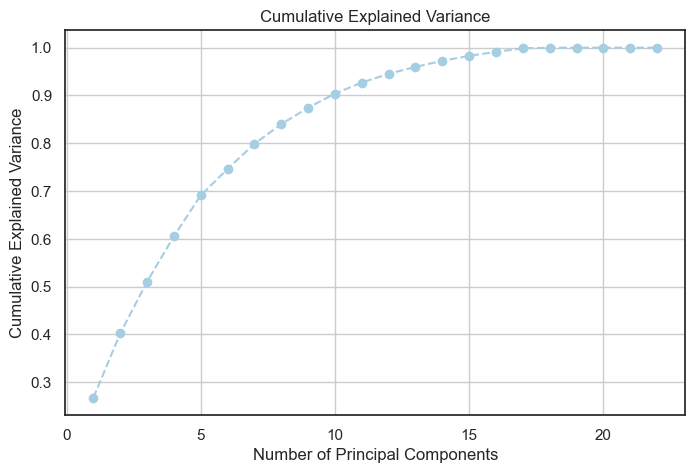

In [81]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [82]:
# Retain components that explain 90% of the variance
pca = PCA(n_components=0.95)  # Automatically selects the number of components
X_reduced = pca.fit_transform(X_train_prepared)
print(f"Number of components in PCA: {pca.n_components_}")

Number of components in PCA: 13


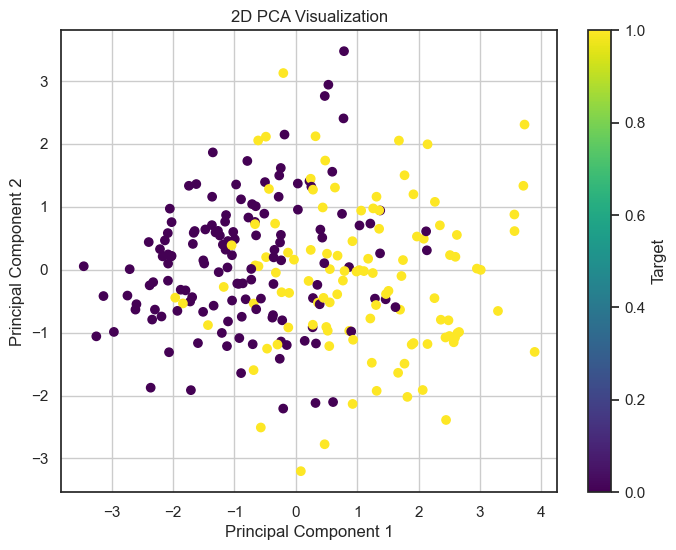

In [83]:
# just for a visulisation of the data for just the first 2 principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap='viridis')  # Use your target variable for coloring
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.colorbar(label='Target')
plt.grid()
plt.show()

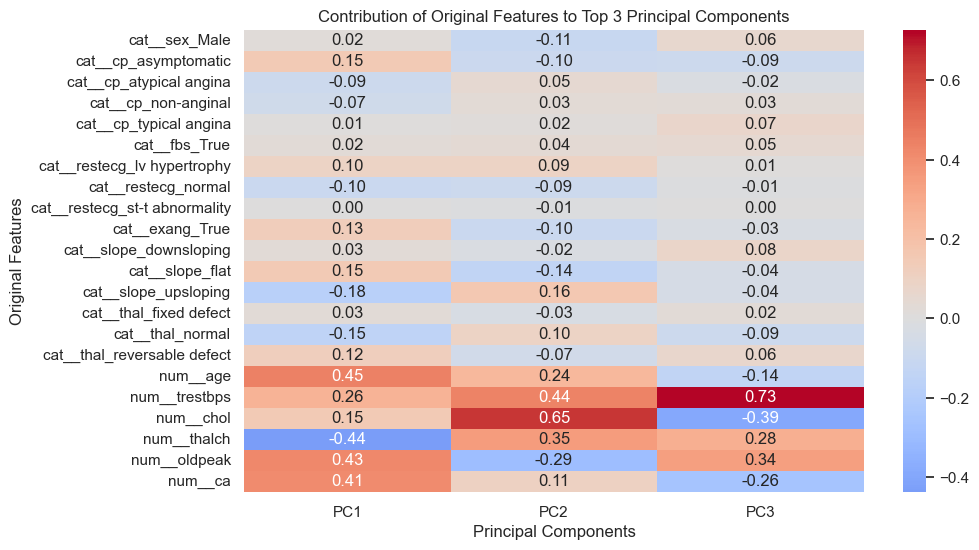

In [84]:
# Get the loadings (contribution of original features to principal components)
loadings = pca.components_

# Create a DataFrame for the loadings
df_loadings = pd.DataFrame(loadings.T, index=feature_names, columns=[f"PC{i+1}" for i in range(loadings.shape[0])])

# Select the top 3 PCs
top3_pcs = df_loadings[["PC1", "PC2", "PC3"]]


plt.figure(figsize=(10, 6))
sns.heatmap(top3_pcs, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Contribution of Original Features to Top 3 Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.show()

We get an understanding of how original features contribute to principal components

## K-means clustering

              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



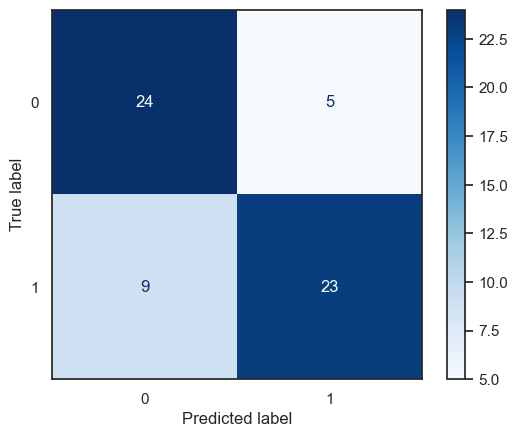

In [85]:
from sklearn.cluster import KMeans

# First we do the K-means clustering without the PCA step

# K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_prepared)

# Predict cluster labels for the test set
y_pred_kmeans = kmeans.predict(X_test_prepared)

# Classification report
print(classification_report(y_test, y_pred_kmeans))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_kmeans)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()

              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



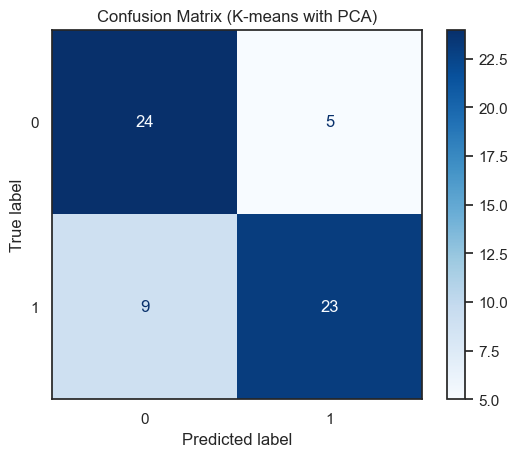

In [86]:
# Initialize PCA with the desired number of components of 10 found just now
pca = PCA(n_components=10)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_prepared)

# Transform the testing data
X_test_pca = pca.transform(X_test_prepared)

# K-means clustering with 2 clusters on PCA-transformed data
kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_train_pca)

# Predict cluster labels for the test set using PCA-transformed data
y_pred_kmeans_pca = kmeans_pca.predict(X_test_pca)

# Classification report for K-means with PCA
print(classification_report(y_test, y_pred_kmeans_pca))

# Get the confusion matrix for K-means with PCA
cm_pca = confusion_matrix(y_test, y_pred_kmeans_pca)

# Plot confusion matrix for K-means with PCA
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=np.unique(y_test))
disp_pca.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (K-means with PCA)')
plt.show()

We observe that even when you use just the top 10 PCs for the 2nd model, it still performs as well as the 1st model with all the components. This means that truly not much information or explained variance was sacrificed with this dimensionality reduction.

For the next few steps, we are performing cross-validation and hyperparameter tuning for the K-means method. Although K-means is mean't to be a unsupervised learning task where label data isn't present, in this data set labels are present. Hence, we can use Supervised Learning metrics like **accuracy** to determine the best parameters to use for the model.



In [87]:
from sklearn.pipeline import Pipeline

# Define the parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': range(2, 11),  # Number of PCs to test
    'kmeans__n_clusters': range(2, 11)  # Number of clusters to test
}

# Create a pipeline with PCA and KMeans
pipeline = Pipeline([
    ('pca', PCA()),  # PCA step
    ('kmeans', KMeans(random_state=42))  # KMeans clustering step
])

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train_prepared, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Get the optimal number of principal components and clusters
optimal_n_components = grid_search.best_params_['pca__n_components']
optimal_n_clusters = grid_search.best_params_['kmeans__n_clusters']

print(f"Optimal number of PCs: {optimal_n_components}")
print(f"Optimal number of clusters: {optimal_n_clusters}")



Best parameters: {'kmeans__n_clusters': 2, 'pca__n_components': 3}
Optimal number of PCs: 3
Optimal number of clusters: 2


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



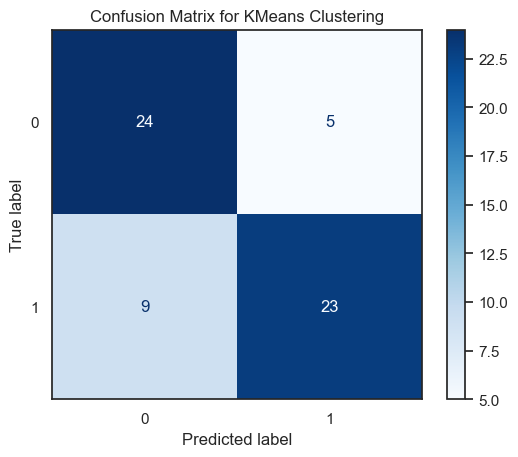

In [88]:
# Refit PCA and KMeans with optimal parameters
pca = PCA(n_components=optimal_n_components)
X_train_pca = pca.fit_transform(X_train_prepared)  # Reduce dimensionality of the training data

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(X_train_pca)

# Transform the test set using the same PCA
X_test_pca = pca.transform(X_test_prepared)
y_pred_kmeans = kmeans.predict(X_test_pca)

# Evaluate classification performance (if applicable)
print("Classification Report:\n", classification_report(y_test, y_pred_kmeans))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_kmeans)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KMeans Clustering")
plt.show()


In [89]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Get cumulative variance for the first 3 PCs
cumulative_variance_3pcs = cumulative_variance[2]  # Index 2 corresponds to the 3rd PC

print(f"Cumulative explained variance with 3 PCs: {cumulative_variance_3pcs}")

Cumulative explained variance with 3 PCs: 0.5100919009737247


After running the components through GridSearchCV, we notice that our K-means can be further optimised with just the use of 3 principal components. Furthermore, we also noticed that the optimal number of clusters also happen to be 2 even though we originally started out with 5 different target values from 0 to 4 where we chose to change them to 0 and 1 by taking heed to the literature. This has now been corroborated with this cross validation step.


## Gaussian Mixture Models

In [90]:
from sklearn.mixture import GaussianMixture

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



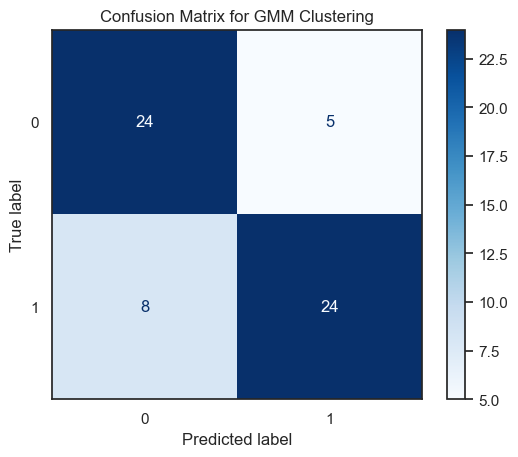

In [91]:
# Initialize PCA with 10 components
pca = PCA(n_components=10)

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train_prepared)

# Initialize Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42) # Assuming 2 components based on previous analysis

# Fit GMM on the PCA-transformed training data
gmm.fit(X_train_pca)

# Predict cluster labels for the test set
X_test_pca = pca.transform(X_test_prepared)
y_pred_gmm = gmm.predict(X_test_pca)

# Evaluate the model (example using classification report)
print(classification_report(y_test, y_pred_gmm))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gmm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for GMM Clustering")
plt.show()

From the above, we observe that the GMM clustering algorithm performs better than K-means even before Cross Validation or hyperparameter tuning. In the next step, we will proceed with the cross validation step.
Similarly, since we have true labels, we can utilise **accuracy** as the metrics to determine the best paramaters to use for GMM.

Best parameters: {'gmm__n_components': 2, 'pca__n_components': 3}
Best CV score: 0.37270408163265306
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



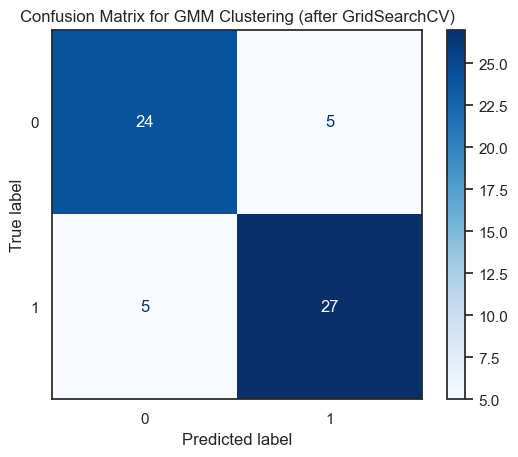

In [92]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': range(2, 11),
    'gmm__n_components': range(2, 11)
}

# Create a pipeline with PCA and GMM
pipeline = Pipeline([
    ('pca', PCA()),
    ('gmm', GaussianMixture(random_state=42))
])

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train_prepared, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_gmm_model = grid_search.best_estimator_
y_pred_gmm = best_gmm_model.predict(X_test_prepared)

print(classification_report(y_test, y_pred_gmm))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gmm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for GMM Clustering (after GridSearchCV)")
plt.show()

After the cross-validation step, the GMM model performed better, improving in accuracy from 79% to 84%.

## Autoencoder

Epoch 1/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.5012 - val_loss: 0.5650
Epoch 2/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4991 - val_loss: 0.5573
Epoch 3/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4856 - val_loss: 0.5497
Epoch 4/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4872 - val_loss: 0.5420
Epoch 5/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4813 - val_loss: 0.5343
Epoch 6/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4735 - val_loss: 0.5264
Epoch 7/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4751 - val_loss: 0.5184
Epoch 8/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4556 - val_loss: 0.5101
Epoch 9/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4460 - val_loss: 0.5017
Epoch 10/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4390 - val_loss: 0.4934
Epoch 11/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4115 - val_loss: 0.4852
Epoch 12/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4090 - val_loss: 0.4773
Epoch 13/80


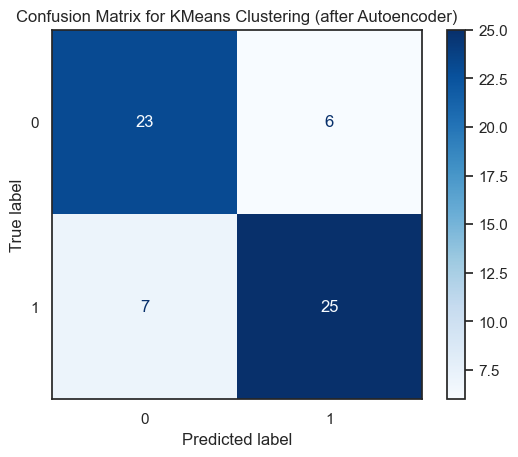

In [93]:
import tensorflow as tf

# Define the autoencoder architecture
input_dim = X_train_prepared.shape[1]  # Number of features in the input data
encoding_dim = 10  # Reduced dimensionality after encoding (you can adjust this)

input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoder) # Sigmoid for 0-1 scaling

autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse') # Mean Squared Error for reconstruction loss

# Train the autoencoder
autoencoder.fit(X_train_prepared, X_train_prepared, epochs=80, batch_size=25, shuffle=True, validation_split = 0.1) # Setting epochs and batch size as 100 and 30

# Get the encoded (latent) representations of the data
encoder_model = tf.keras.models.Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder_model.predict(X_train_prepared)
X_test_encoded = encoder_model.predict(X_test_prepared)

# Apply K-means clustering to the encoded data
kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters as before
kmeans.fit(X_train_encoded)

# Predict clusters for the test set
y_pred_kmeans = kmeans.predict(X_test_encoded)

# Evaluate the performance
print(classification_report(y_test, y_pred_kmeans))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_kmeans)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KMeans Clustering (after Autoencoder)")
plt.show()

The performance of the K-means clustering method used together with auto-encoding is dependent on the epochs and batch size chosen. Too high an epoch and too small batch size leads to overfitting.

The performance of this k-means clustering (autoencoder) results in 79% accuracy which is better than the 77% achieved by k-means clustering done with PCA.

In general, this is expected since:
*   Autoencoders use non-linear activation functions (ReLU and sigmoid in our case) in their layers, allowing them to learn non-linear transformations of the data.
*   Autoencoders are more flexible in terms of architecture since number of layers and neurons can be chosen, even though this wasn't necessary in this problem that we were looking to solve



# Summary

In this section, we summarise our findings for the models that we have explored:
*   Logistic Regression with Cross Validation: 82%
*   Decision Tree with Cross Validation: 74%
*   Random Forest with Cross Validation: 89%
*   SVM with RBF Kernel with Cross Validation: 90%
*   Neural Networks with Cross Validation: 87%
*   K-means clustering with PCA: 77%
*   GMM clustering with PCA: 84%
*   K-means clustering with Autoencoder: 79%

In conclusion, through all the supervised and unsupervised models coupled with the cross-validation and dimensionality reduction steps, we learn that SVM with RBF kernel with cross validation performs the best.

This shouldn't be surprising since SVM with RBF kernel works particularly well with smaller datasets where computational resources are not as demanding. Also there are a total of 22 features in play in our processed dataset. SVM with RBF kernel also works particularly well with high dimensionality.

While this is our current conclusion, we think that with more computational resource dedicated to this dataset, there would likely be better models that can emerge from different model classes. Promising ones are Neural Networks and GMM which could benefit from longer training.

